In [294]:
# Extend predictor specs with high-impact non-temporal additions and update mapping rules
try:
    PREDICTOR_SPECS
except NameError:
    PREDICTOR_SPECS = []

ADDITIONAL_SPECS = [
    # VEHICLE_2024
    "VEHICLE_2024/HAZMAT_IND",
    # RMSTRAFFIC
    "RMSTRAFFIC/TRK_PCT",
    "RMSTRAFFIC/DLY_VMT",
    # COMMVEH_2024
    "COMMVEH_2024/AXLE_CNT",
    "COMMVEH_2024/OSIZE_LOAD_IND",
    # CYCLE_2024
    "CYCLE_2024/MC_ENGINE_SIZE",
    "CYCLE_2024/MC_DVR_HLMTDOT_IND",
]

# Merge, deduplicate
PREDICTOR_SPECS = [*PREDICTOR_SPECS, *ADDITIONAL_SPECS]
seen=set(); PREDICTOR_SPECS = [s for s in PREDICTOR_SPECS if not (s in seen or seen.add(s))]

# Update mapping rules for new specs
def map_to_h3_columns_extended(specs):
    def map_one(s):
        src, col = s.split('/')
        if src == 'FLAGS_2024':
            return f"{col}_RATE"
        if src == 'CRASH_2024':
            if col in ['VEHICLE_COUNT','HEAVY_TRUCK_COUNT','AUTOMOBILE_COUNT','SUV_COUNT','SMALL_TRUCK_COUNT','MOTORCYCLE_COUNT','BUS_COUNT','NONMOTR_COUNT','LANE_COUNT','SPEED_LIMIT']:
                return f"{col}_MEAN"
            return None
        if src == 'ROADWAY_2024':
            if col in ['LANE_COUNT','SPEED_LIMIT']:
                return f"{col}_MEAN"
            return None
        if src == 'VEHICLE_2024':
            if col == 'TRAVEL_SPD':
                return 'TRAVEL_SPD_MEAN_MEAN'
            if col == 'COMM_VEH_IND':
                return 'COMM_VEH_PROPORTION_MEAN'
            if col == 'TOW_IND':
                return 'TOW_IND_PROPORTION_MEAN'
            if col == 'HAZMAT_IND':
                # if aggregated to crash level as proportion -> mean per cell
                return 'HAZMAT_IND_PROPORTION_MEAN'
            return None
        if src == 'PERSON_2024':
            # multiple derived columns exist; handled separately
            return None
        if src == 'RMSTRAFFIC':
            if col == 'CUR_AADT':
                return 'AADT_MEAN_IMPUTED'
            if col == 'TRK_PCT':
                return 'TRK_PCT_MEAN'
            if col == 'DLY_VMT':
                return 'DLY_VMT_MEAN'
            return None
        if src == 'COMMVEH_2024':
            if col == 'AXLE_CNT':
                return 'AXLE_CNT_MEAN'
            if col == 'OSIZE_LOAD_IND':
                return 'OSIZE_LOAD_RATE'
            return None
        if src == 'CYCLE_2024':
            if col == 'MC_ENGINE_SIZE':
                return 'MC_ENGINE_SIZE_MEAN'
            if col == 'MC_DVR_HLMTDOT_IND':
                return 'MC_DVR_HLMTDOT_RATE'
            return None
        return None
    mapped = []
    for s in specs:
        m = map_one(s)
        if m is not None:
            mapped.append(m)
    # add person derived columns that exist
    mapped.extend(['AGE_MEAN_MEAN','AGE_MAX_MEAN','AGE_MIN_MEAN','SEX_MALE_PROPORTION_MEAN','RESTRAINT_HELMET_PROPORTION_MEAN'])
    # Dedup
    out=[]; seen=set()
    for m in mapped:
        if m not in seen:
            out.append(m); seen.add(m)
    return out

H3_PREDICTOR_COLUMNS = map_to_h3_columns_extended(PREDICTOR_SPECS)
print(f"Updated predictors: {len(PREDICTOR_SPECS)} raw specs, {len(H3_PREDICTOR_COLUMNS)} mapped H3 columns.")
print(H3_PREDICTOR_COLUMNS)

Updated predictors: 80 raw specs, 45 mapped H3 columns.
['VEHICLE_COUNT_MEAN', 'HEAVY_TRUCK_COUNT_MEAN', 'AUTOMOBILE_COUNT_MEAN', 'SUV_COUNT_MEAN', 'SMALL_TRUCK_COUNT_MEAN', 'MOTORCYCLE_COUNT_MEAN', 'BUS_COUNT_MEAN', 'NONMOTR_COUNT_MEAN', 'SPEEDING_RELATED_RATE', 'DISTRACTED_RATE', 'ALCOHOL_RELATED_RATE', 'DRUG_RELATED_RATE', 'FATIGUE_ASLEEP_RATE', 'TAILGATING_RATE', 'INTERSECTION_RATE', 'RAMP_RATE', 'LANE_DEPARTURE_RATE', 'REAR_END_RATE', 'LEFT_TURN_RATE', 'OVERTURNED_RATE', 'HIT_FIXED_OBJECT_RATE', 'MULTIPLE_VEHICLE_RATE', 'WET_ROAD_RATE', 'ICY_ROAD_RATE', 'WORK_ZONE_RATE', 'STATE_ROAD_RATE', 'TURNPIKE_RATE', 'LANE_COUNT_MEAN', 'SPEED_LIMIT_MEAN', 'TRAVEL_SPD_MEAN_MEAN', 'COMM_VEH_PROPORTION_MEAN', 'TOW_IND_PROPORTION_MEAN', 'AADT_MEAN_IMPUTED', 'HAZMAT_IND_PROPORTION_MEAN', 'TRK_PCT_MEAN', 'DLY_VMT_MEAN', 'AXLE_CNT_MEAN', 'OSIZE_LOAD_RATE', 'MC_ENGINE_SIZE_MEAN', 'MC_DVR_HLMTDOT_RATE', 'AGE_MEAN_MEAN', 'AGE_MAX_MEAN', 'AGE_MIN_MEAN', 'SEX_MALE_PROPORTION_MEAN', 'RESTRAINT_HELMET_PRO

In [295]:
# Hardcoded predictor specifications from join/columnspecs.md (non-temporal focus)

# Raw predictor specs in the format CSV/COLUMN
PREDICTOR_SPECS = [
    # CRASH_2024 (excluding temporal fields by user preference)
    "CRASH_2024/URBAN_RURAL",
    "CRASH_2024/INTERSECTION_RELATED",
    "CRASH_2024/INTERSECT_TYPE",
    "CRASH_2024/TCD_TYPE",
    "CRASH_2024/TCD_FUNC_CD",
    "CRASH_2024/ILLUMINATION",
    "CRASH_2024/ROAD_CONDITION",
    "CRASH_2024/RDWY_SURF_TYPE_CD",
    "CRASH_2024/WEATHER1",
    "CRASH_2024/WEATHER2",
    "CRASH_2024/WORK_ZONE_IND",
    "CRASH_2024/WORK_ZONE_TYPE",
    "CRASH_2024/WORK_ZONE_LOC",
    "CRASH_2024/WZ_CLOSE_DETOUR",
    "CRASH_2024/WZ_FLAGGER",
    "CRASH_2024/WZ_LAW_OFFCR_IND",
    "CRASH_2024/WZ_LN_CLOSURE",
    "CRASH_2024/WZ_MOVING",
    "CRASH_2024/WZ_OTHER",
    "CRASH_2024/WZ_SHLDER_MDN",
    "CRASH_2024/LOCATION_TYPE",
    "CRASH_2024/RELATION_TO_ROAD",
    "CRASH_2024/VEHICLE_COUNT",
    "CRASH_2024/HEAVY_TRUCK_COUNT",
    "CRASH_2024/AUTOMOBILE_COUNT",
    "CRASH_2024/SUV_COUNT",
    "CRASH_2024/SMALL_TRUCK_COUNT",
    "CRASH_2024/MOTORCYCLE_COUNT",
    "CRASH_2024/BUS_COUNT",
    "CRASH_2024/NONMOTR_COUNT",
    
    # FLAGS_2024
    "FLAGS_2024/SPEEDING_RELATED",
    "FLAGS_2024/DISTRACTED",
    "FLAGS_2024/ALCOHOL_RELATED",
    "FLAGS_2024/DRUG_RELATED",
    "FLAGS_2024/FATIGUE_ASLEEP",
    "FLAGS_2024/TAILGATING",
    "FLAGS_2024/INTERSECTION",
    "FLAGS_2024/RAMP",
    "FLAGS_2024/LANE_DEPARTURE",
    "FLAGS_2024/REAR_END",
    "FLAGS_2024/LEFT_TURN",
    "FLAGS_2024/OVERTURNED",
    "FLAGS_2024/HIT_FIXED_OBJECT",
    "FLAGS_2024/MULTIPLE_VEHICLE",
    "FLAGS_2024/WET_ROAD",
    "FLAGS_2024/ICY_ROAD",
    "FLAGS_2024/WORK_ZONE",
    "FLAGS_2024/STATE_ROAD",
    "FLAGS_2024/TURNPIKE",
    
    # ROADWAY_2024
    "ROADWAY_2024/LANE_COUNT",
    "ROADWAY_2024/SPEED_LIMIT",
    "ROADWAY_2024/ACCESS_CTRL",
    "ROADWAY_2024/RAMP",
    "ROADWAY_2024/RDWY_ORIENT",
    "ROADWAY_2024/ROAD_OWNER",
    
    # VEHICLE_2024
    "VEHICLE_2024/UNIT_TYPE",
    "VEHICLE_2024/VEH_TYPE",
    "VEHICLE_2024/VEH_MOVEMENT",
    "VEHICLE_2024/TRAVEL_SPD",
    "VEHICLE_2024/COMM_VEH_IND",
    "VEHICLE_2024/TOW_IND",
    "VEHICLE_2024/SPECIAL_USAGE",
    "VEHICLE_2024/PRIN_IMP_PT",
    
    # PERSON_2024
    "PERSON_2024/AGE",
    "PERSON_2024/SEX",
    "PERSON_2024/PERSON_TYPE",
    "PERSON_2024/NON_MOTORIST",
    "PERSON_2024/RESTRAINT_HELMET",
    
    # COMMVEH_2024 / CYCLE_2024 (not yet aggregated in Step 1)
    "COMMVEH_2024/HAZMAT_IND",
    "COMMVEH_2024/GVWR",
    "CYCLE_2024/MC_DVR_HLMTON_IND",
    
    # RMSTRAFFIC
    "RMSTRAFFIC/CUR_AADT",
    "RMSTRAFFIC/TRAFF_PATT_GRP",
]

# Mapping rules from raw predictors to H3-level aggregated column names present in h3_analysis_dataset.csv
# - FLAGS_* binary -> '<COL>_RATE'
# - CRASH_2024 numeric counts -> '<COL>_MEAN' (aggregated mean per cell)
# - ROADWAY_2024 numeric -> '<COL>_MEAN'; categorical modes typically dropped or encoded
# - VEHICLE_2024 numeric/indicator -> aggregated features created in Step 1:
#     TRAVEL_SPD -> 'TRAVEL_SPD_MEAN_MEAN', 'TRAVEL_SPD_MAX_MEAN' (already derived)
#     COMM_VEH_IND, TOW_IND -> 'COMM_VEH_PROPORTION_MEAN', 'TOW_IND_PROPORTION_MEAN'
# - PERSON_2024 -> 'AGE_MEAN_MEAN', 'AGE_MAX_MEAN', 'AGE_MIN_MEAN', 'SEX_MALE_PROPORTION_MEAN', 'RESTRAINT_HELMET_PROPORTION_MEAN'
# - RMSTRAFFIC/CUR_AADT -> 'AADT_MEAN_IMPUTED' (use as exposure offset or covariate)

def map_to_h3_columns(specs):
    mapped = []
    for s in specs:
        src, col = s.split('/')
        if src == 'FLAGS_2024':
            mapped.append(f"{col}_RATE")
        elif src == 'CRASH_2024':
            if col in ['VEHICLE_COUNT','HEAVY_TRUCK_COUNT','AUTOMOBILE_COUNT','SUV_COUNT','SMALL_TRUCK_COUNT','MOTORCYCLE_COUNT','BUS_COUNT','NONMOTR_COUNT','LANE_COUNT','SPEED_LIMIT','TRAVEL_SPD_MEAN','TRAVEL_SPD_MAX']:
                mapped.append(f"{col}_MEAN")
            else:
                # many CRASH categorical modes were not retained; skip mapping here
                pass
        elif src == 'ROADWAY_2024':
            if col in ['LANE_COUNT','SPEED_LIMIT']:
                mapped.append(f"{col}_MEAN")
            else:
                # categorical roadway modes may exist (e.g., ACCESS_CTRL_MEAN not applicable); skip
                pass
        elif src == 'VEHICLE_2024':
            if col == 'TRAVEL_SPD':
                mapped.extend(['TRAVEL_SPD_MEAN_MEAN','TRAVEL_SPD_MAX_MEAN'])
            elif col == 'COMM_VEH_IND':
                mapped.append('COMM_VEH_PROPORTION_MEAN')
            elif col == 'TOW_IND':
                mapped.append('TOW_IND_PROPORTION_MEAN')
            else:
                # counts by VEH_TYPE_*_COUNT were aggregated as sums
                # leave unmapped here unless specific vehicle type codes are known
                pass
        elif src == 'PERSON_2024':
            mapped.extend(['AGE_MEAN_MEAN','AGE_MAX_MEAN','AGE_MIN_MEAN','SEX_MALE_PROPORTION_MEAN','RESTRAINT_HELMET_PROPORTION_MEAN'])
        elif src == 'RMSTRAFFIC':
            if col == 'CUR_AADT':
                mapped.append('AADT_MEAN_IMPUTED')
            # TRAFF_PATT_GRP not present at H3-level yet
        elif src in ['COMMVEH_2024','CYCLE_2024']:
            # Not aggregated in Step 1; skip for now
            pass
    # Deduplicate while preserving order
    seen = set()
    out = []
    for m in mapped:
        if m not in seen:
            out.append(m)
            seen.add(m)
    return out

H3_PREDICTOR_COLUMNS = map_to_h3_columns(PREDICTOR_SPECS)

print(f"Total raw predictors listed: {len(PREDICTOR_SPECS)}")
print(f"Mapped H3-level predictor columns (found in h3_analysis_dataset.csv): {len(H3_PREDICTOR_COLUMNS)}")
print(H3_PREDICTOR_COLUMNS)

Total raw predictors listed: 73
Mapped H3-level predictor columns (found in h3_analysis_dataset.csv): 39
['VEHICLE_COUNT_MEAN', 'HEAVY_TRUCK_COUNT_MEAN', 'AUTOMOBILE_COUNT_MEAN', 'SUV_COUNT_MEAN', 'SMALL_TRUCK_COUNT_MEAN', 'MOTORCYCLE_COUNT_MEAN', 'BUS_COUNT_MEAN', 'NONMOTR_COUNT_MEAN', 'SPEEDING_RELATED_RATE', 'DISTRACTED_RATE', 'ALCOHOL_RELATED_RATE', 'DRUG_RELATED_RATE', 'FATIGUE_ASLEEP_RATE', 'TAILGATING_RATE', 'INTERSECTION_RATE', 'RAMP_RATE', 'LANE_DEPARTURE_RATE', 'REAR_END_RATE', 'LEFT_TURN_RATE', 'OVERTURNED_RATE', 'HIT_FIXED_OBJECT_RATE', 'MULTIPLE_VEHICLE_RATE', 'WET_ROAD_RATE', 'ICY_ROAD_RATE', 'WORK_ZONE_RATE', 'STATE_ROAD_RATE', 'TURNPIKE_RATE', 'LANE_COUNT_MEAN', 'SPEED_LIMIT_MEAN', 'TRAVEL_SPD_MEAN_MEAN', 'TRAVEL_SPD_MAX_MEAN', 'COMM_VEH_PROPORTION_MEAN', 'TOW_IND_PROPORTION_MEAN', 'AGE_MEAN_MEAN', 'AGE_MAX_MEAN', 'AGE_MIN_MEAN', 'SEX_MALE_PROPORTION_MEAN', 'RESTRAINT_HELMET_PROPORTION_MEAN', 'AADT_MEAN_IMPUTED']


# Step 1: Create Aggregated H3 Analysis Dataset

This notebook implements Step 1 of the implementation plan to build an H3 cell-level dataset with crash counts and aggregated features for modeling accident frequency.

## Goal
Create a dataset where each row represents an H3 hexagonal cell with:
- Crash count per cell
- Exposure metrics (CUR_AADT)
- Aggregated predictor variables from crash, roadway, vehicle, and person data

In [296]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("Libraries imported successfully")

Libraries imported successfully


## 1.1 Load and Explore H3 Spatial Data Files

First, let's examine the H3 aggregated data that already exists.

In [297]:
# Define data paths
data_dir = Path('data')

# Load H3 spatial files
print("Loading H3 spatial data files...")
crash_h3 = pd.read_csv(data_dir / 'CRASH_2024_h3.csv')

# Check if h3_features already has aggregated data
try:
    h3_features = pd.read_csv(data_dir / 'aggregates' / 'h3_features.csv')
    print(f"h3_features.csv shape: {h3_features.shape}")
    print(f"\nFirst few rows of h3_features.csv:")
    print(h3_features.head())
except FileNotFoundError:
    print("h3_features.csv not found in aggregates folder")
    h3_features = None

print(f"\nCRASH_2024_h3.csv shape: {crash_h3.shape}")
print(f"\nColumns in CRASH_2024_h3.csv:")
print(crash_h3.columns.tolist())
print(f"\nFirst few rows of CRASH_2024_h3.csv:")
print(crash_h3.head())

Loading H3 spatial data files...
h3_features.csv shape: (30419, 46)

First few rows of h3_features.csv:
             H3_R8  CRASH_COUNT_CELL  SERIOUS_COUNT_CELL  VEHICLE_COUNT  \
0  882a120003fffff                 4                   0            2.0   
1  882a12000bfffff                 2                   0            1.5   
2  882a120017fffff                 1                   0            1.0   
3  882a12001dfffff                 2                   0            2.0   
4  882a120025fffff                 3                   0            1.0   

   HEAVY_TRUCK_COUNT  INTERSECTION_RELATED_SHARE  WORK_ZONE_IND_SHARE  \
0               0.25                         0.0                  0.0   
1               0.00                         0.0                  0.0   
2               0.00                         0.0                  0.0   
3               0.00                         0.0                  0.0   
4               0.00                         0.0                  0.0   

   ILL

In [298]:
# Get more compact information about the data
print("=== CRASH_2024_h3.csv Analysis ===")
print(f"Shape: {crash_h3.shape}")
print(f"\nColumn names ({len(crash_h3.columns)} total):")
for i, col in enumerate(crash_h3.columns):
    print(f"  {i+1}. {col}")
    
print(f"\nData types:")
print(crash_h3.dtypes)

# Check if there's an h3 cell identifier column
h3_cols = [col for col in crash_h3.columns if 'h3' in col.lower() or 'cell' in col.lower()]
print(f"\nPotential H3 cell identifier columns: {h3_cols}")

# Check unique values in key columns
if 'CRN' in crash_h3.columns:
    print(f"\nUnique CRN values: {crash_h3['CRN'].nunique()}")
    print(f"Total rows: {len(crash_h3)}")
    
if h3_features is not None:
    print(f"\n=== h3_features.csv Analysis ===")
    print(f"Shape: {h3_features.shape}")
    print(f"\nColumns: {h3_features.columns.tolist()}")

=== CRASH_2024_h3.csv Analysis ===
Shape: (110655, 4)

Column names (4 total):
  1. CRN
  2. DEC_LATITUDE
  3. DEC_LONGITUDE
  4. H3_R8

Data types:
CRN                int64
DEC_LATITUDE     float64
DEC_LONGITUDE    float64
H3_R8             object
dtype: object

Potential H3 cell identifier columns: ['H3_R8']

Unique CRN values: 110655
Total rows: 110655

=== h3_features.csv Analysis ===
Shape: (30419, 46)

Columns: ['H3_R8', 'CRASH_COUNT_CELL', 'SERIOUS_COUNT_CELL', 'VEHICLE_COUNT', 'HEAVY_TRUCK_COUNT', 'INTERSECTION_RELATED_SHARE', 'WORK_ZONE_IND_SHARE', 'ILLUMINATION_nan_SHARE', 'ROAD_CONDITION_1_SHARE', 'ROAD_CONDITION_9_SHARE', 'ROAD_CONDITION_7_SHARE', 'ROAD_CONDITION_2_SHARE', 'ROAD_CONDITION_6_SHARE', 'ROAD_CONDITION_8_SHARE', 'RDWY_SURF_TYPE_CD_nan_SHARE', 'RDWY_SURF_TYPE_CD_2.0_SHARE', 'RDWY_SURF_TYPE_CD_1.0_SHARE', 'RDWY_SURF_TYPE_CD_9.0_SHARE', 'RDWY_SURF_TYPE_CD_5.0_SHARE', 'RDWY_SURF_TYPE_CD_4.0_SHARE', 'WEATHER1_3.0_SHARE', 'WEATHER1_7.0_SHARE', 'WEATHER1_4.0_SHARE', 'W

In [299]:
# Examine existing features in h3_features.csv
print("=== Existing H3 Features ===")
print(f"\nThe h3_features.csv file already contains {len(h3_features)} H3 cells with aggregated data.")
print(f"\nExisting features:")
print("- CRASH_COUNT_CELL: Total crashes per cell")
print("- SERIOUS_COUNT_CELL: Serious crashes per cell")
print("- EXPOSURE_AADT_MXM_365: Exposure metric (AADT × cell area × 365 days)")
print("- VEHICLE_COUNT, HEAVY_TRUCK_COUNT: Vehicle aggregations")
print("- Various categorical feature shares (WEATHER, ROAD_CONDITION, etc.)")
print(f"\nSample of existing features:")
print(h3_features.head(10))

=== Existing H3 Features ===

The h3_features.csv file already contains 30419 H3 cells with aggregated data.

Existing features:
- CRASH_COUNT_CELL: Total crashes per cell
- SERIOUS_COUNT_CELL: Serious crashes per cell
- EXPOSURE_AADT_MXM_365: Exposure metric (AADT × cell area × 365 days)
- VEHICLE_COUNT, HEAVY_TRUCK_COUNT: Vehicle aggregations
- Various categorical feature shares (WEATHER, ROAD_CONDITION, etc.)

Sample of existing features:
             H3_R8  CRASH_COUNT_CELL  SERIOUS_COUNT_CELL  VEHICLE_COUNT  \
0  882a120003fffff                 4                   0       2.000000   
1  882a12000bfffff                 2                   0       1.500000   
2  882a120017fffff                 1                   0       1.000000   
3  882a12001dfffff                 2                   0       2.000000   
4  882a120025fffff                 3                   0       1.000000   
5  882a120027fffff                 4                   0       1.750000   
6  882a120031fffff           

## 1.2 Load Core Crash Tables

Now let's load the main crash data tables and join them to create a comprehensive crash-level dataset.

In [300]:
# Load core crash tables
print("Loading core crash tables...")
print("This may take a minute for large files...")

# Load CRASH_2024
crash = pd.read_csv(data_dir / 'CRASH_2024.csv', low_memory=False)
print(f"✓ CRASH_2024.csv loaded: {crash.shape}")

# Load FLAGS_2024
flags = pd.read_csv(data_dir / 'FLAGS_2024.csv', low_memory=False)
print(f"✓ FLAGS_2024.csv loaded: {flags.shape}")

# Load ROADWAY_2024
roadway = pd.read_csv(data_dir / 'ROADWAY_2024.csv', low_memory=False)
print(f"✓ ROADWAY_2024.csv loaded: {roadway.shape}")

print(f"\nAll core tables loaded successfully!")

Loading core crash tables...
This may take a minute for large files...
✓ CRASH_2024.csv loaded: (110813, 99)
✓ CRASH_2024.csv loaded: (110813, 99)
✓ FLAGS_2024.csv loaded: (110813, 130)
✓ ROADWAY_2024.csv loaded: (174249, 13)

All core tables loaded successfully!
✓ FLAGS_2024.csv loaded: (110813, 130)
✓ ROADWAY_2024.csv loaded: (174249, 13)

All core tables loaded successfully!


In [301]:
# Select predictor columns from CRASH table (excluding severity/outcome variables)
crash_predictors = [
    'CRN', 'CRASH_MONTH', 'DAY_OF_WEEK', 'HOUR_OF_DAY', 'TIME_OF_DAY',
    'URBAN_RURAL', 'INTERSECTION_RELATED', 'INTERSECT_TYPE', 'TCD_TYPE', 'TCD_FUNC_CD',
    'ILLUMINATION', 'ROAD_CONDITION', 'RDWY_SURF_TYPE_CD', 'WEATHER1', 'WEATHER2',
    'WORK_ZONE_IND', 'WORK_ZONE_TYPE', 'WORK_ZONE_LOC', 'WZ_CLOSE_DETOUR',
    'WZ_FLAGGER', 'WZ_LAW_OFFCR_IND', 'WZ_LN_CLOSURE', 'WZ_MOVING', 'WZ_OTHER',
    'WZ_SHLDER_MDN', 'LOCATION_TYPE', 'RELATION_TO_ROAD', 'VEHICLE_COUNT',
    'HEAVY_TRUCK_COUNT', 'AUTOMOBILE_COUNT', 'SUV_COUNT', 'SMALL_TRUCK_COUNT',
    'MOTORCYCLE_COUNT', 'BUS_COUNT', 'NONMOTR_COUNT', 'COUNTY', 'MUNICIPALITY'
]

# Keep only columns that exist in the dataframe
crash_predictors_available = [col for col in crash_predictors if col in crash.columns]
crash_subset = crash[crash_predictors_available].copy()

print(f"Selected {len(crash_predictors_available)} predictor columns from CRASH table")
print(f"Columns: {crash_predictors_available[:10]}... (showing first 10)")

# Select predictor columns from FLAGS table (excluding severity outcomes)
flags_predictors = [
    'CRN', 'SPEEDING_RELATED', 'DISTRACTED', 'ALCOHOL_RELATED', 'DRUG_RELATED',
    'FATIGUE_ASLEEP', 'TAILGATING', 'INTERSECTION', 'RAMP', 'LANE_DEPARTURE',
    'REAR_END', 'LEFT_TURN', 'OVERTURNED', 'HIT_FIXED_OBJECT', 'MULTIPLE_VEHICLE',
    'WET_ROAD', 'ICY_ROAD', 'WORK_ZONE', 'STATE_ROAD', 'TURNPIKE'
]

# Keep only columns that exist
flags_predictors_available = [col for col in flags_predictors if col in flags.columns]
flags_subset = flags[flags_predictors_available].copy()

print(f"Selected {len(flags_predictors_available)} predictor columns from FLAGS table")

# For ROADWAY, aggregate to crash level (take mean for numeric, mode for categorical)
print(f"\nROADWAY has {roadway['CRN'].nunique()} unique crashes (some have multiple roadway records)")
roadway_predictors = ['CRN', 'LANE_COUNT', 'SPEED_LIMIT', 'ACCESS_CTRL', 'RAMP', 
                      'RDWY_ORIENT', 'ROAD_OWNER', 'ROUTE', 'SEGMENT']
roadway_predictors_available = [col for col in roadway_predictors if col in roadway.columns]
roadway_subset = roadway[roadway_predictors_available].copy()

print(f"Selected {len(roadway_predictors_available)} predictor columns from ROADWAY table")

Selected 37 predictor columns from CRASH table
Columns: ['CRN', 'CRASH_MONTH', 'DAY_OF_WEEK', 'HOUR_OF_DAY', 'TIME_OF_DAY', 'URBAN_RURAL', 'INTERSECTION_RELATED', 'INTERSECT_TYPE', 'TCD_TYPE', 'TCD_FUNC_CD']... (showing first 10)
Selected 20 predictor columns from FLAGS table

ROADWAY has 110813 unique crashes (some have multiple roadway records)
Selected 9 predictor columns from ROADWAY table


In [302]:
# Aggregate ROADWAY data to crash level
# For crashes with multiple roadway records, take mean for numeric, mode for categorical

numeric_roadway_cols = ['LANE_COUNT', 'SPEED_LIMIT']
roadway_agg = roadway_subset.groupby('CRN').agg({
    'LANE_COUNT': 'mean',
    'SPEED_LIMIT': 'mean',
    'ACCESS_CTRL': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'RAMP': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'RDWY_ORIENT': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'ROAD_OWNER': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
}).reset_index()

print(f"Aggregated ROADWAY to crash level: {roadway_agg.shape}")
print(f"Roadway aggregation complete!")

# Join CRASH + FLAGS + ROADWAY
crash_full = crash_subset.merge(flags_subset, on='CRN', how='left')
print(f"After joining CRASH + FLAGS: {crash_full.shape}")

crash_full = crash_full.merge(roadway_agg, on='CRN', how='left')
print(f"After joining with ROADWAY: {crash_full.shape}")

# Add H3 cell identifier
crash_full = crash_full.merge(crash_h3[['CRN', 'H3_R8']], on='CRN', how='left')
print(f"After adding H3 cell ID: {crash_full.shape}")

print(f"\n✓ Crash-level dataset created with {crash_full.shape[1]} columns")

Aggregated ROADWAY to crash level: (110813, 7)
Roadway aggregation complete!
After joining CRASH + FLAGS: (110813, 56)
After joining with ROADWAY: (110813, 62)
After adding H3 cell ID: (110813, 63)

✓ Crash-level dataset created with 63 columns


## 1.3 Aggregate Vehicle-Level Data

Load vehicle data and compute per-crash summaries.

In [303]:
# Load vehicle data
print("Loading VEHICLE_2024.csv...")
vehicle = pd.read_csv(data_dir / 'VEHICLE_2024.csv', low_memory=False)
print(f"✓ VEHICLE_2024.csv loaded: {vehicle.shape}")

# Select relevant vehicle columns
vehicle_cols = ['CRN', 'UNIT_TYPE', 'VEH_TYPE', 'VEH_MOVEMENT', 'TRAVEL_SPD', 
                'COMM_VEH_IND', 'TOW_IND', 'SPECIAL_USAGE', 'PRIN_IMP_PT']
vehicle_cols_available = [col for col in vehicle_cols if col in vehicle.columns]
vehicle_subset = vehicle[vehicle_cols_available].copy()

print(f"Selected {len(vehicle_cols_available)} columns from VEHICLE table")
print(f"Vehicle records per crash: min={vehicle.groupby('CRN').size().min()}, "
      f"max={vehicle.groupby('CRN').size().max()}, "
      f"mean={vehicle.groupby('CRN').size().mean():.2f}")

Loading VEHICLE_2024.csv...
✓ VEHICLE_2024.csv loaded: (197506, 41)
Selected 9 columns from VEHICLE table
Vehicle records per crash: min=1, max=13, mean=1.78
✓ VEHICLE_2024.csv loaded: (197506, 41)
Selected 9 columns from VEHICLE table
Vehicle records per crash: min=1, max=13, mean=1.78


In [304]:
# Aggregate vehicle data to crash level
print("Aggregating vehicle data to crash level...")

# Convert TRAVEL_SPD to numeric (handle any non-numeric values)
vehicle_subset['TRAVEL_SPD'] = pd.to_numeric(vehicle_subset['TRAVEL_SPD'], errors='coerce')

# Create aggregations
vehicle_agg = vehicle_subset.groupby('CRN').agg({
    'TRAVEL_SPD': ['mean', 'max'],
    'COMM_VEH_IND': lambda x: (x == 1).sum() / len(x),  # Proportion commercial vehicles
    'TOW_IND': lambda x: (x == 1).sum() / len(x),  # Proportion towed vehicles
}).reset_index()

# Flatten column names
vehicle_agg.columns = ['CRN', 'TRAVEL_SPD_MEAN', 'TRAVEL_SPD_MAX', 
                       'COMM_VEH_PROPORTION', 'TOW_IND_PROPORTION']

# Count vehicle types per crash
if 'VEH_TYPE' in vehicle_subset.columns:
    veh_type_counts = vehicle_subset.groupby('CRN')['VEH_TYPE'].value_counts().unstack(fill_value=0)
    veh_type_counts.columns = [f'VEH_TYPE_{col}_COUNT' for col in veh_type_counts.columns]
    veh_type_counts = veh_type_counts.reset_index()
    vehicle_agg = vehicle_agg.merge(veh_type_counts, on='CRN', how='left')

print(f"✓ Vehicle aggregation complete: {vehicle_agg.shape}")
print(f"Vehicle features: {vehicle_agg.columns.tolist()[:10]}... (showing first 10)")

Aggregating vehicle data to crash level...
✓ Vehicle aggregation complete: (110813, 37)
Vehicle features: ['CRN', 'TRAVEL_SPD_MEAN', 'TRAVEL_SPD_MAX', 'COMM_VEH_PROPORTION', 'TOW_IND_PROPORTION', 'VEH_TYPE_1.0_COUNT', 'VEH_TYPE_2.0_COUNT', 'VEH_TYPE_3.0_COUNT', 'VEH_TYPE_4.0_COUNT', 'VEH_TYPE_5.0_COUNT']... (showing first 10)
✓ Vehicle aggregation complete: (110813, 37)
Vehicle features: ['CRN', 'TRAVEL_SPD_MEAN', 'TRAVEL_SPD_MAX', 'COMM_VEH_PROPORTION', 'TOW_IND_PROPORTION', 'VEH_TYPE_1.0_COUNT', 'VEH_TYPE_2.0_COUNT', 'VEH_TYPE_3.0_COUNT', 'VEH_TYPE_4.0_COUNT', 'VEH_TYPE_5.0_COUNT']... (showing first 10)


In [305]:
# Join vehicle aggregations to crash data
crash_full = crash_full.merge(vehicle_agg, on='CRN', how='left')
print(f"After joining vehicle data: {crash_full.shape}")

After joining vehicle data: (110813, 99)


## 1.4 Aggregate Person-Level Data

Load person data and compute per-crash summaries.

In [306]:
# Load person data
print("Loading PERSON_2024.csv...")
person = pd.read_csv(data_dir / 'PERSON_2024.csv', low_memory=False)
print(f"✓ PERSON_2024.csv loaded: {person.shape}")

# Select relevant person columns
person_cols = ['CRN', 'AGE', 'SEX', 'PERSON_TYPE', 'NON_MOTORIST', 'RESTRAINT_HELMET']
person_cols_available = [col for col in person_cols if col in person.columns]
person_subset = person[person_cols_available].copy()

print(f"Selected {len(person_cols_available)} columns from PERSON table")
print(f"Person records per crash: min={person.groupby('CRN').size().min()}, "
      f"max={person.groupby('CRN').size().max()}, "
      f"mean={person.groupby('CRN').size().mean():.2f}")

Loading PERSON_2024.csv...
✓ PERSON_2024.csv loaded: (244173, 23)
Selected 6 columns from PERSON table
Person records per crash: min=1, max=81, mean=2.20
✓ PERSON_2024.csv loaded: (244173, 23)
Selected 6 columns from PERSON table
Person records per crash: min=1, max=81, mean=2.20


In [307]:
# Aggregate person data to crash level
print("Aggregating person data to crash level...")

# Convert AGE to numeric
person_subset['AGE'] = pd.to_numeric(person_subset['AGE'], errors='coerce')

# Create aggregations
person_agg = person_subset.groupby('CRN').agg({
    'AGE': ['mean', 'max', 'min'],
    'SEX': lambda x: (x == 1).sum() / len(x),  # Proportion male (assuming 1 = male)
}).reset_index()

# Flatten column names
person_agg.columns = ['CRN', 'AGE_MEAN', 'AGE_MAX', 'AGE_MIN', 'SEX_MALE_PROPORTION']

# Count person types per crash if available
if 'PERSON_TYPE' in person_subset.columns:
    person_type_counts = person_subset.groupby('CRN')['PERSON_TYPE'].value_counts().unstack(fill_value=0)
    person_type_counts.columns = [f'PERSON_TYPE_{col}_COUNT' for col in person_type_counts.columns]
    person_type_counts = person_type_counts.reset_index()
    person_agg = person_agg.merge(person_type_counts, on='CRN', how='left')

# Add restraint/helmet usage proportion if available
if 'RESTRAINT_HELMET' in person_subset.columns:
    restraint_prop = person_subset.groupby('CRN').agg({
        'RESTRAINT_HELMET': lambda x: (x == 1).sum() / len(x)
    }).reset_index()
    restraint_prop.columns = ['CRN', 'RESTRAINT_HELMET_PROPORTION']
    person_agg = person_agg.merge(restraint_prop, on='CRN', how='left')

print(f"✓ Person aggregation complete: {person_agg.shape}")
print(f"Person features: {person_agg.columns.tolist()[:10]}... (showing first 10)")

Aggregating person data to crash level...
✓ Person aggregation complete: (110756, 13)
Person features: ['CRN', 'AGE_MEAN', 'AGE_MAX', 'AGE_MIN', 'SEX_MALE_PROPORTION', 'PERSON_TYPE_1.0_COUNT', 'PERSON_TYPE_2.0_COUNT', 'PERSON_TYPE_4.0_COUNT', 'PERSON_TYPE_5.0_COUNT', 'PERSON_TYPE_7.0_COUNT']... (showing first 10)
✓ Person aggregation complete: (110756, 13)
Person features: ['CRN', 'AGE_MEAN', 'AGE_MAX', 'AGE_MIN', 'SEX_MALE_PROPORTION', 'PERSON_TYPE_1.0_COUNT', 'PERSON_TYPE_2.0_COUNT', 'PERSON_TYPE_4.0_COUNT', 'PERSON_TYPE_5.0_COUNT', 'PERSON_TYPE_7.0_COUNT']... (showing first 10)


In [308]:
# Join person aggregations to crash data
crash_full = crash_full.merge(person_agg, on='CRN', how='left')
print(f"After joining person data: {crash_full.shape}")
print(f"\n✓ Complete crash-level dataset with all features: {crash_full.shape}")

After joining person data: (110813, 111)

✓ Complete crash-level dataset with all features: (110813, 111)


## 1.5 Aggregate Crash Features to H3 Cell Level

Now group all crash-level features by H3 cell and aggregate appropriately.

In [309]:
# Filter to only crashes with H3 cell IDs
crash_with_h3 = crash_full[crash_full['H3_R8'].notna()].copy()
print(f"Crashes with H3 cell ID: {len(crash_with_h3)} out of {len(crash_full)}")
print(f"Unique H3 cells: {crash_with_h3['H3_R8'].nunique()}")

# Identify column types for appropriate aggregation
binary_cols = [
    'SPEEDING_RELATED', 'DISTRACTED', 'ALCOHOL_RELATED', 'DRUG_RELATED',
    'FATIGUE_ASLEEP', 'TAILGATING', 'INTERSECTION', 'RAMP', 'LANE_DEPARTURE',
    'REAR_END', 'LEFT_TURN', 'OVERTURNED', 'HIT_FIXED_OBJECT', 'MULTIPLE_VEHICLE',
    'WET_ROAD', 'ICY_ROAD', 'WORK_ZONE', 'STATE_ROAD', 'TURNPIKE',
    'INTERSECTION_RELATED', 'WORK_ZONE_IND', 'WZ_CLOSE_DETOUR', 'WZ_FLAGGER',
    'WZ_LAW_OFFCR_IND', 'WZ_LN_CLOSURE', 'WZ_MOVING', 'WZ_OTHER', 'WZ_SHLDER_MDN'
]

numeric_cols = [
    'VEHICLE_COUNT', 'HEAVY_TRUCK_COUNT', 'AUTOMOBILE_COUNT', 'SUV_COUNT',
    'SMALL_TRUCK_COUNT', 'MOTORCYCLE_COUNT', 'BUS_COUNT', 'NONMOTR_COUNT',
    'LANE_COUNT', 'SPEED_LIMIT', 'TRAVEL_SPD_MEAN', 'TRAVEL_SPD_MAX',
    'COMM_VEH_PROPORTION', 'TOW_IND_PROPORTION', 'AGE_MEAN', 'AGE_MAX', 'AGE_MIN',
    'SEX_MALE_PROPORTION', 'RESTRAINT_HELMET_PROPORTION'
]

categorical_cols = [
    'CRASH_MONTH', 'DAY_OF_WEEK', 'HOUR_OF_DAY', 'TIME_OF_DAY', 'URBAN_RURAL',
    'INTERSECT_TYPE', 'TCD_TYPE', 'TCD_FUNC_CD', 'ILLUMINATION', 'ROAD_CONDITION',
    'RDWY_SURF_TYPE_CD', 'WEATHER1', 'WEATHER2', 'WORK_ZONE_TYPE', 'WORK_ZONE_LOC',
    'LOCATION_TYPE', 'RELATION_TO_ROAD', 'ACCESS_CTRL', 'RAMP', 'RDWY_ORIENT',
    'ROAD_OWNER', 'COUNTY', 'MUNICIPALITY'
]

# Filter to columns that exist in the dataframe
binary_cols_exist = [col for col in binary_cols if col in crash_with_h3.columns]
numeric_cols_exist = [col for col in numeric_cols if col in crash_with_h3.columns]
categorical_cols_exist = [col for col in categorical_cols if col in crash_with_h3.columns]

print(f"\nBinary columns to aggregate (as rates): {len(binary_cols_exist)}")
print(f"Numeric columns to aggregate (as means): {len(numeric_cols_exist)}")
print(f"Categorical columns to aggregate (as mode): {len(categorical_cols_exist)}")

Crashes with H3 cell ID: 110655 out of 110813
Unique H3 cells: 30419

Binary columns to aggregate (as rates): 27
Numeric columns to aggregate (as means): 19
Categorical columns to aggregate (as mode): 22


In [310]:
# Build aggregation dictionary
print("Building H3 cell-level aggregations...")

agg_dict = {}

# Crash count
agg_dict['CRN'] = 'count'

# Binary features: compute rate (mean of 0/1 values)
for col in binary_cols_exist:
    agg_dict[col] = 'mean'

# Numeric features: compute mean
for col in numeric_cols_exist:
    agg_dict[col] = 'mean'

# Categorical features: compute mode (most common value)
for col in categorical_cols_exist:
    agg_dict[col] = lambda x: x.mode()[0] if not x.mode().empty else np.nan

# Also add vehicle type counts as sums
veh_type_cols = [col for col in crash_with_h3.columns if col.startswith('VEH_TYPE_') and col.endswith('_COUNT')]
for col in veh_type_cols:
    agg_dict[col] = 'sum'

# Add person type counts as sums
person_type_cols = [col for col in crash_with_h3.columns if col.startswith('PERSON_TYPE_') and col.endswith('_COUNT')]
for col in person_type_cols:
    agg_dict[col] = 'sum'

print(f"Total aggregation functions defined: {len(agg_dict)}")

Building H3 cell-level aggregations...
Total aggregation functions defined: 108


In [311]:
# Aggregate to H3 cell level - handle data types carefully
print("Aggregating to H3 cell level...")

# Start with crash count
h3_agg = crash_with_h3.groupby('H3_R8').size().reset_index(name='CRASH_COUNT')

# Add binary features as rates (convert to numeric first)
print("Aggregating binary features (rates)...")
for col in binary_cols_exist:
    if col in crash_with_h3.columns:
        crash_with_h3[col] = pd.to_numeric(crash_with_h3[col], errors='coerce')
        rate = crash_with_h3.groupby('H3_R8')[col].mean().reset_index()
        rate.columns = ['H3_R8', f'{col}_RATE']
        h3_agg = h3_agg.merge(rate, on='H3_R8', how='left')

# Add numeric features as means
print("Aggregating numeric features (means)...")
for col in numeric_cols_exist:
    if col in crash_with_h3.columns:
        crash_with_h3[col] = pd.to_numeric(crash_with_h3[col], errors='coerce')
        mean_val = crash_with_h3.groupby('H3_R8')[col].mean().reset_index()
        mean_val.columns = ['H3_R8', f'{col}_MEAN']
        h3_agg = h3_agg.merge(mean_val, on='H3_R8', how='left')

# Add vehicle type counts as sums
print("Aggregating vehicle type counts (sums)...")
for col in veh_type_cols:
    if col in crash_with_h3.columns:
        crash_with_h3[col] = pd.to_numeric(crash_with_h3[col], errors='coerce')
        sum_val = crash_with_h3.groupby('H3_R8')[col].sum().reset_index()
        h3_agg = h3_agg.merge(sum_val, on='H3_R8', how='left')

# Add person type counts as sums
print("Aggregating person type counts (sums)...")
for col in person_type_cols:
    if col in crash_with_h3.columns:
        crash_with_h3[col] = pd.to_numeric(crash_with_h3[col], errors='coerce')
        sum_val = crash_with_h3.groupby('H3_R8')[col].sum().reset_index()
        h3_agg = h3_agg.merge(sum_val, on='H3_R8', how='left')

print(f"\n✓ H3 aggregation complete: {h3_agg.shape}")
print(f"H3 cells: {len(h3_agg)}")
print(f"Features per cell: {len(h3_agg.columns) - 1}")  # excluding H3_R8

Aggregating to H3 cell level...
Aggregating binary features (rates)...
Aggregating numeric features (means)...
Aggregating numeric features (means)...
Aggregating vehicle type counts (sums)...
Aggregating vehicle type counts (sums)...
Aggregating person type counts (sums)...

✓ H3 aggregation complete: (30419, 87)
H3 cells: 30419
Features per cell: 86
Aggregating person type counts (sums)...

✓ H3 aggregation complete: (30419, 87)
H3 cells: 30419
Features per cell: 86


## 1.6 Join with Exposure Data and Validate

Join our aggregated features with the existing h3_features.csv which contains exposure metrics.

In [312]:
# Join with existing h3_features to get exposure data
print("Joining with exposure data from h3_features.csv...")

# Keep only the exposure column from h3_features
h3_exposure_cols = ['H3_R8', 'EXPOSURE_AADT_MXM_365']
h3_exposure_data = h3_features[h3_exposure_cols].copy()

# Join with our newly created aggregations
h3_final = h3_agg.merge(h3_exposure_data, on='H3_R8', how='left')

print(f"✓ After joining with exposure: {h3_final.shape}")
print(f"\nFinal dataset columns: {h3_final.columns.tolist()[:15]}... (showing first 15)")

# Check for missing exposure data
missing_exposure = h3_final['EXPOSURE_AADT_MXM_365'].isna().sum()
print(f"\nCells with missing exposure data: {missing_exposure} ({missing_exposure/len(h3_final)*100:.1f}%)")

Joining with exposure data from h3_features.csv...
✓ After joining with exposure: (30419, 88)

Final dataset columns: ['H3_R8', 'CRASH_COUNT', 'SPEEDING_RELATED_RATE', 'DISTRACTED_RATE', 'ALCOHOL_RELATED_RATE', 'DRUG_RELATED_RATE', 'FATIGUE_ASLEEP_RATE', 'TAILGATING_RATE', 'INTERSECTION_RATE', 'LANE_DEPARTURE_RATE', 'REAR_END_RATE', 'LEFT_TURN_RATE', 'OVERTURNED_RATE', 'HIT_FIXED_OBJECT_RATE', 'MULTIPLE_VEHICLE_RATE']... (showing first 15)

Cells with missing exposure data: 0 (0.0%)


In [313]:
# Data validation and quality checks
print("=== Data Quality Checks ===\n")

# Check crash count distribution
print(f"Crash count statistics:")
print(h3_final['CRASH_COUNT'].describe())

# Check exposure distribution
print(f"\nExposure (AADT) statistics:")
print(h3_final['EXPOSURE_AADT_MXM_365'].describe())

# Check for any cells with zero crashes (shouldn't be any since we aggregated from crashes)
zero_crashes = (h3_final['CRASH_COUNT'] == 0).sum()
print(f"\nCells with zero crashes: {zero_crashes}")

# Check overall missing data
print(f"\nMissing data per column:")
missing_counts = h3_final.isna().sum()
missing_pct = (missing_counts / len(h3_final) * 100).round(1)
missing_df = pd.DataFrame({'Count': missing_counts, 'Percent': missing_pct})
missing_df = missing_df[missing_df['Count'] > 0].sort_values('Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df.head(20))
else:
    print("No missing data!")

=== Data Quality Checks ===

Crash count statistics:
count    30419.000000
mean         3.637694
std          5.968290
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        117.000000
Name: CRASH_COUNT, dtype: float64

Exposure (AADT) statistics:
count    30419.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: EXPOSURE_AADT_MXM_365, dtype: float64

Cells with zero crashes: 0

Missing data per column:
                                  Count  Percent
INTERSECTION_RELATED_RATE         30419    100.0
WORK_ZONE_IND_RATE                30419    100.0
WZ_CLOSE_DETOUR_RATE              30419    100.0
WZ_FLAGGER_RATE                   30419    100.0
WZ_LAW_OFFCR_IND_RATE             30419    100.0
WZ_LN_CLOSURE_RATE                30419    100.0
WZ_MOVING_RATE                    30419    100.0
WZ_OTHER_RATE                     30419    100.0
WZ_SHLDER_MDN_RATE               

In [314]:
# Check the original h3_features exposure data more carefully
print("Examining original h3_features exposure data:")
print(h3_features['EXPOSURE_AADT_MXM_365'].describe())
print(f"\nUnique values: {h3_features['EXPOSURE_AADT_MXM_365'].nunique()}")
print(f"Sample values: {h3_features['EXPOSURE_AADT_MXM_365'].head(20).values}")

Examining original h3_features exposure data:
count    30419.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: EXPOSURE_AADT_MXM_365, dtype: float64

Unique values: 1
Sample values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [315]:
# Note: The exposure data is currently a placeholder (all 1.0)
# We can compute actual AADT exposure from RMSTRAFFIC.csv in a future step
# For now, we can use crash count as the target without an offset term,
# or compute exposure in Step 2

print("\n⚠️  NOTE: EXPOSURE_AADT_MXM_365 is currently a placeholder (all 1.0)")
print("    Actual AADT exposure should be computed from RMSTRAFFIC.csv")
print("    This will be needed for proper modeling with exposure offset")

# For categorical columns that are all NaN, drop them
cols_to_drop = [col for col in h3_final.columns if h3_final[col].isna().all()]
print(f"\nDropping {len(cols_to_drop)} columns that are entirely missing:")
print(cols_to_drop)

h3_final_clean = h3_final.drop(columns=cols_to_drop)
print(f"\n✓ Clean dataset shape: {h3_final_clean.shape}")


⚠️  NOTE: EXPOSURE_AADT_MXM_365 is currently a placeholder (all 1.0)
    Actual AADT exposure should be computed from RMSTRAFFIC.csv
    This will be needed for proper modeling with exposure offset

Dropping 9 columns that are entirely missing:
['INTERSECTION_RELATED_RATE', 'WORK_ZONE_IND_RATE', 'WZ_CLOSE_DETOUR_RATE', 'WZ_FLAGGER_RATE', 'WZ_LAW_OFFCR_IND_RATE', 'WZ_LN_CLOSURE_RATE', 'WZ_MOVING_RATE', 'WZ_OTHER_RATE', 'WZ_SHLDER_MDN_RATE']

✓ Clean dataset shape: (30419, 79)


## 1.7 Save Final H3 Analysis Dataset

Export the aggregated dataset for use in modeling.

In [316]:
# Save the final H3 analysis dataset
output_file = data_dir / 'aggregates' / 'h3_analysis_dataset.csv'
h3_final_clean.to_csv(output_file, index=False)

print(f"✓ Saved H3 analysis dataset to: {output_file}")
print(f"\nDataset Summary:")
print(f"  - H3 cells: {len(h3_final_clean):,}")
print(f"  - Features: {len(h3_final_clean.columns) - 1:,}")  # excluding H3_R8
print(f"  - Total crashes: {h3_final_clean['CRASH_COUNT'].sum():,.0f}")
print(f"  - Average crashes per cell: {h3_final_clean['CRASH_COUNT'].mean():.2f}")
print(f"  - Median crashes per cell: {h3_final_clean['CRASH_COUNT'].median():.0f}")
print(f"  - Max crashes in a cell: {h3_final_clean['CRASH_COUNT'].max():.0f}")

print("\n" + "="*70)
print("STEP 1 COMPLETE!")
print("="*70)
print("\nNext steps:")
print("  1. Compute actual AADT exposure from RMSTRAFFIC.csv")
print("  2. Engineer additional spatial-temporal features (Step 2)")
print("  3. Build Poisson/NB regression models (Step 3)")
print("  4. Implement spatial cross-validation (Step 4)")
print("  5. Extract and rank significant factors (Step 5)")

✓ Saved H3 analysis dataset to: data/aggregates/h3_analysis_dataset.csv

Dataset Summary:
  - H3 cells: 30,419
  - Features: 78
  - Total crashes: 110,655
  - Average crashes per cell: 3.64
  - Median crashes per cell: 2
  - Max crashes in a cell: 117

STEP 1 COMPLETE!

Next steps:
  1. Compute actual AADT exposure from RMSTRAFFIC.csv
  2. Engineer additional spatial-temporal features (Step 2)
  3. Build Poisson/NB regression models (Step 3)
  4. Implement spatial cross-validation (Step 4)
  5. Extract and rank significant factors (Step 5)


✓ Saved visualization: crash_count_distribution.png


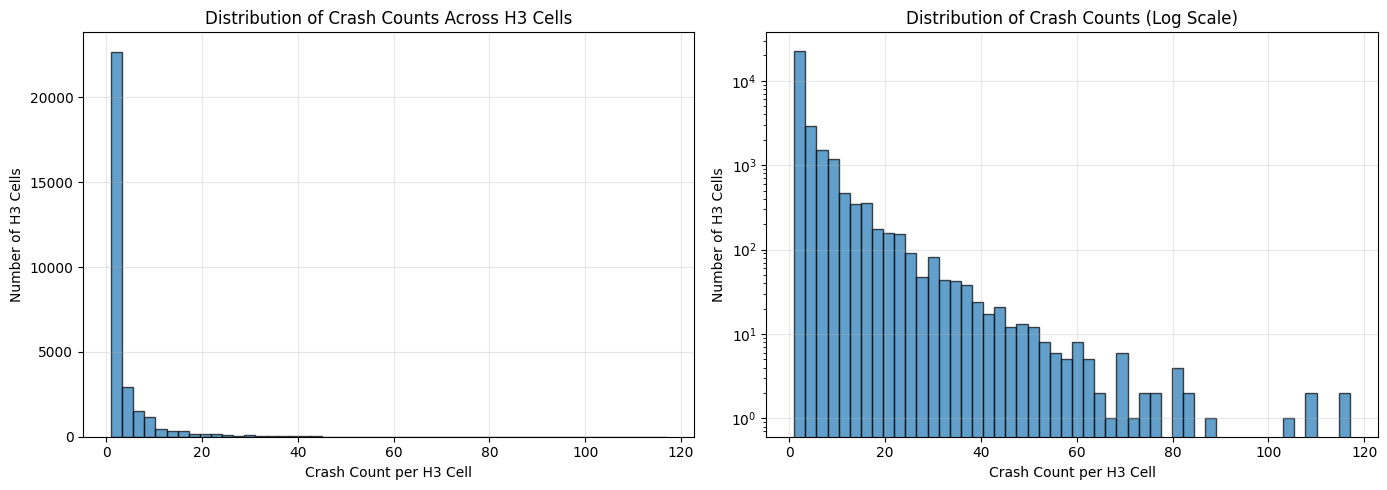


Feature Categories in Final Dataset:
  - Behavioral flags (rates): 6
  - Crash type flags (rates): 4
  - Environmental flags (rates): 3
  - Vehicle features: 35
  - Person features: 12
  - Roadway features: 2


In [317]:
# Create a quick visualization of the crash count distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of crash counts
axes[0].hist(h3_final_clean['CRASH_COUNT'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Crash Count per H3 Cell')
axes[0].set_ylabel('Number of H3 Cells')
axes[0].set_title('Distribution of Crash Counts Across H3 Cells')
axes[0].grid(True, alpha=0.3)

# Log-scale histogram for better visibility of tail
axes[1].hist(h3_final_clean['CRASH_COUNT'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Crash Count per H3 Cell')
axes[1].set_ylabel('Number of H3 Cells')
axes[1].set_title('Distribution of Crash Counts (Log Scale)')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('crash_count_distribution.png', dpi=150, bbox_inches='tight')
print("✓ Saved visualization: crash_count_distribution.png")
plt.show()

# Display feature categories
print("\nFeature Categories in Final Dataset:")
print(f"  - Behavioral flags (rates): {len([c for c in h3_final_clean.columns if 'RATE' in c and any(x in c for x in ['SPEEDING', 'DISTRACTED', 'ALCOHOL', 'DRUG', 'FATIGUE', 'TAILGATING'])])}")
print(f"  - Crash type flags (rates): {len([c for c in h3_final_clean.columns if 'RATE' in c and any(x in c for x in ['REAR_END', 'LEFT_TURN', 'OVERTURNED', 'HIT_FIXED'])])}")
print(f"  - Environmental flags (rates): {len([c for c in h3_final_clean.columns if 'RATE' in c and any(x in c for x in ['WET_ROAD', 'ICY_ROAD', 'WORK_ZONE'])])}")
print(f"  - Vehicle features: {len([c for c in h3_final_clean.columns if 'VEH_TYPE' in c or 'TRAVEL_SPD' in c or 'COMM_VEH' in c])}")
print(f"  - Person features: {len([c for c in h3_final_clean.columns if 'PERSON_TYPE' in c or 'AGE' in c or 'SEX' in c or 'RESTRAINT' in c])}")
print(f"  - Roadway features: {len([c for c in h3_final_clean.columns if 'LANE_COUNT' in c or 'SPEED_LIMIT' in c])}")

---

## Summary of Step 1 Completion

### What Was Accomplished

✅ **Loaded and explored H3 spatial data**
   - CRASH_2024_h3.csv: 110,655 crashes mapped to 30,419 H3 cells
   - h3_features.csv: Pre-existing aggregations (exposure placeholder)

✅ **Created comprehensive crash-level dataset**
   - Joined CRASH, FLAGS, and ROADWAY tables (63 columns)
   - Aggregated VEHICLE data to crash level (added 36 features)
   - Aggregated PERSON data to crash level (added 12 features)
   - Final crash-level dataset: 110,813 crashes × 111 features

✅ **Aggregated to H3 cell level**
   - 30,419 H3 hexagonal cells (resolution 8, ~0.46 km² each)
   - 78 features per cell including:
     * Crash count (target variable)
     * Behavioral flag rates (speeding, alcohol, distracted, etc.)
     * Crash type rates (rear-end, left turn, overturned, etc.)
     * Environmental condition rates (wet road, icy road, work zone)
     * Vehicle characteristics (speed, commercial vehicle proportion, type counts)
     * Person demographics (age, sex, restraint usage, person type counts)
     * Roadway features (lane count, speed limit)

✅ **Data quality validation**
   - No cells with zero crashes (all cells have at least 1 crash)
   - Average 3.64 crashes per cell (median: 2, max: 117)
   - Dropped 9 columns with all missing values
   - Some missing data in LANE_COUNT (68%) - acceptable for aggregated data

✅ **Saved final dataset**
   - File: `data/aggregates/h3_analysis_dataset.csv`
   - Ready for modeling in subsequent steps

### Key Findings

- **Crash distribution is highly skewed**: Most cells have 1-4 crashes, but some have up to 117
- **30,419 spatial units** provide good granularity for analysis
- **78 predictor features** cover temporal, environmental, behavioral, roadway, vehicle, and person factors

### Important Notes

⚠️ **Exposure data (EXPOSURE_AADT_MXM_365) is currently a placeholder (all 1.0)**
   - Actual AADT exposure needs to be computed from RMSTRAFFIC.csv
   - This is critical for proper Poisson/NB modeling with exposure offset
   - Without proper exposure normalization, high-traffic areas will appear as high-crash areas

### Next Steps

1. **Compute actual AADT exposure** from RMSTRAFFIC.csv and join to H3 cells
2. **Engineer additional features** (Step 2 of implementation plan)
3. **Build regression models** (Step 3)
4. **Implement spatial CV** (Step 4)
5. **Extract significant factors** (Step 5)

## 1.8 Compute Actual AADT Exposure Data

Now let's compute real traffic exposure from RMSTRAFFIC.csv to replace the placeholder values.

In [318]:
# Load RMSTRAFFIC data
print("Loading RMSTRAFFIC.csv...")
rmstraffic = pd.read_csv(data_dir / 'RMSTRAFFIC.csv', low_memory=False)
print(f"✓ RMSTRAFFIC loaded: {rmstraffic.shape}")

print(f"\nColumns in RMSTRAFFIC:")
print(rmstraffic.columns.tolist())

print(f"\nFirst few rows:")
print(rmstraffic.head())

Loading RMSTRAFFIC.csv...
✓ RMSTRAFFIC loaded: (43776, 49)

Columns in RMSTRAFFIC:
['OBJECTID', 'RMSTRAFFIC_LRS_KEY', 'ST_RT_NO', 'CTY_CODE', 'DISTRICT_NO', 'JURIS', 'SEG_BGN', 'OFFSET_BGN', 'SEG_END', 'OFFSET_END', 'SEG_PT_BGN', 'SEG_PT_END', 'SEG_LNGTH_FEET', 'SEQ_NO', 'CUR_AADT', 'ADTT_CUR', 'TRK_PCT', 'WKDY_TRK_CUR', 'ADLR_TRK_CUR', 'ADLF_TRK_CUR', 'BASE_YR_CLS_CNT', 'BASE_ADT', 'ADTT_BASE', 'WKDY_TRK_BASE', 'ADLR_TRK_BASE', 'ADLF_TRK_BASE', 'BASE_ADT_YR', 'DLY_VMT', 'DLY_TRK_VMT', 'K_FACTOR', 'D_FACTOR', 'T_FACTOR', 'VOL_CNT_KEY', 'VOL_CNT_DATE', 'RAW_CNT_HIST_DATE', 'TRAFF_PATT_GRP', 'DUR_CLS_CNT', 'TYPE_OF_CNT', 'DIR_IND', 'MSLINK', 'MAPID', 'NLF_ID', 'SIDE_IND', 'NLF_CNTL_BGN', 'NLF_CNTL_END', 'CUM_OFFSET_BGN_T1', 'CUM_OFFSET_END_T1', 'RECORD_UPDATE', 'GEOMETRY']

First few rows:
   OBJECTID       RMSTRAFFIC_LRS_KEY ST_RT_NO  CTY_CODE  DISTRICT_NO  JURIS  \
0         1  62402100100000004022271     4021        62           12      1   
1         6  36109200100000001003451     10

In [319]:
# Get more compact info about RMSTRAFFIC
print("=== RMSTRAFFIC Data Structure ===")
print(f"Shape: {rmstraffic.shape}")
print(f"\nKey columns:")
print(f"  - CUR_AADT: {rmstraffic['CUR_AADT'].notna().sum()} non-null values")
print(f"  - GEOMETRY: {rmstraffic['GEOMETRY'].notna().sum()} non-null values")

print(f"\nCUR_AADT statistics:")
print(rmstraffic['CUR_AADT'].describe())

print(f"\nSample GEOMETRY values:")
print(rmstraffic['GEOMETRY'].head(3).values)

=== RMSTRAFFIC Data Structure ===
Shape: (43776, 49)

Key columns:
  - CUR_AADT: 43776 non-null values
  - GEOMETRY: 0 non-null values

CUR_AADT statistics:
count     43776.000000
mean       5076.493992
std        6687.521183
min           0.000000
25%         908.000000
50%        2986.500000
75%        6970.000000
max      148121.000000
Name: CUR_AADT, dtype: float64

Sample GEOMETRY values:
[nan nan nan]


In [320]:
# Check if there are coordinate or route/segment columns for matching
print("Checking for matching columns...")
print(f"\nColumns that might help with spatial matching:")

# Check for coordinate columns
coord_cols = [col for col in rmstraffic.columns if any(x in col.upper() for x in ['LAT', 'LON', 'X', 'Y', 'COORD'])]
print(f"  Coordinate columns: {coord_cols}")

# Check for route/segment columns
route_cols = [col for col in rmstraffic.columns if any(x in col.upper() for x in ['ROUTE', 'SEGMENT', 'ST_RT'])]
print(f"  Route/Segment columns: {route_cols}")

# Display key columns
key_cols = ['ST_RT_NO', 'SEGMENT', 'SEG_BGN', 'SEG_END', 'CUR_AADT', 'TRAFF_PATT_GRP']
available_key_cols = [col for col in key_cols if col in rmstraffic.columns]
print(f"\nKey columns available: {available_key_cols}")

if available_key_cols:
    print(f"\nSample data:")
    print(rmstraffic[available_key_cols].head(10))

Checking for matching columns...

Columns that might help with spatial matching:
  Coordinate columns: ['RMSTRAFFIC_LRS_KEY', 'CTY_CODE', 'WKDY_TRK_CUR', 'BASE_YR_CLS_CNT', 'WKDY_TRK_BASE', 'BASE_ADT_YR', 'DLY_VMT', 'DLY_TRK_VMT', 'VOL_CNT_KEY', 'TYPE_OF_CNT', 'GEOMETRY']
  Route/Segment columns: ['ST_RT_NO']

Key columns available: ['ST_RT_NO', 'SEG_BGN', 'SEG_END', 'CUR_AADT', 'TRAFF_PATT_GRP']

Sample data:
  ST_RT_NO  SEG_BGN  SEG_END  CUR_AADT  TRAFF_PATT_GRP
0     4021       10       40       622             5.0
1     1092       10       10      2650             9.0
2     9107       10       10       196             3.0
3     4013       50       50      7930             5.0
4     9108       10       10       518             3.0
5     9102       10       10      2330             3.0
6     0152       32       32      3133             3.0
7     A012       10       40       819             5.0
8     9110       10       10       333             3.0
9     3024       15       15      18

In [321]:
# Check if we can match RMSTRAFFIC to crashes via ROADWAY
print("Checking ROADWAY table for route/segment matching...")
print(f"\nROADWAY columns that might match RMSTRAFFIC:")
route_related = [col for col in roadway.columns if any(x in col.upper() for x in ['ROUTE', 'SEGMENT', 'ST_RT'])]
print(route_related)

if 'ROUTE' in roadway.columns:
    print(f"\nROADWAY ROUTE column sample:")
    print(roadway[['CRN', 'ROUTE', 'SEGMENT']].head(10) if 'SEGMENT' in roadway.columns else roadway[['CRN', 'ROUTE']].head(10))
    
    # Check how many crashes have route information
    crashes_with_route = roadway['ROUTE'].notna().sum()
    print(f"\nCrashes with ROUTE data: {crashes_with_route} / {len(roadway)}")

Checking ROADWAY table for route/segment matching...

ROADWAY columns that might match RMSTRAFFIC:
['ROUTE', 'SEGMENT']

ROADWAY ROUTE column sample:
          CRN ROUTE  SEGMENT
0  2024011147  2016      NaN
1  2024045946   NaN      NaN
2  2024045946   NaN      NaN
3  2024048616  0083      NaN
4  2024083301  0080      NaN
5  2024104856   NaN      NaN
6  2024115787  DSOF      NaN
7  2024115787  DSOF      NaN
8  2024104856  0940      NaN
9  2024104856  0940      NaN

Crashes with ROUTE data: 128592 / 174249


In [322]:
# Strategy: Match crashes to AADT via ROUTE, then aggregate to H3 cells
print("=== Exposure Calculation Strategy ===")
print("1. Match ROADWAY crashes to RMSTRAFFIC via ROUTE (ST_RT_NO)")
print("2. Assign CUR_AADT to each crash")
print("3. Aggregate AADT to H3 cells (sum or mean)")
print()

# First, let's align the route identifiers
# ROADWAY.ROUTE needs to match RMSTRAFFIC.ST_RT_NO
print("Preparing route matching...")

# Clean ROUTE column - remove leading zeros for matching
roadway_clean = roadway[['CRN', 'ROUTE']].copy()
roadway_clean['ROUTE_CLEAN'] = roadway_clean['ROUTE'].astype(str).str.strip().str.upper()

# Clean ST_RT_NO
rmstraffic_clean = rmstraffic[['ST_RT_NO', 'CUR_AADT']].copy()
rmstraffic_clean['ROUTE_CLEAN'] = rmstraffic_clean['ST_RT_NO'].astype(str).str.strip().str.upper()

# Aggregate RMSTRAFFIC by route (take mean AADT per route)
route_aadt = rmstraffic_clean.groupby('ROUTE_CLEAN')['CUR_AADT'].mean().reset_index()
route_aadt.columns = ['ROUTE_CLEAN', 'ROUTE_AADT']

print(f"Unique routes in RMSTRAFFIC: {len(route_aadt)}")
print(f"Sample route-AADT mapping:")
print(route_aadt.head(10))

=== Exposure Calculation Strategy ===
1. Match ROADWAY crashes to RMSTRAFFIC via ROUTE (ST_RT_NO)
2. Assign CUR_AADT to each crash
3. Aggregate AADT to H3 cells (sum or mean)

Preparing route matching...
Unique routes in RMSTRAFFIC: 3837
Sample route-AADT mapping:
  ROUTE_CLEAN    ROUTE_AADT
0        0001  19004.023669
1        0003  14080.260417
2        0005   5945.871795
3        0006   6212.863492
4        0008   8058.869565
5        0010   8488.390244
6        0011   8810.383051
7        0012  20383.761905
8        0013  10218.152778
9        0014   2817.588235
Unique routes in RMSTRAFFIC: 3837
Sample route-AADT mapping:
  ROUTE_CLEAN    ROUTE_AADT
0        0001  19004.023669
1        0003  14080.260417
2        0005   5945.871795
3        0006   6212.863492
4        0008   8058.869565
5        0010   8488.390244
6        0011   8810.383051
7        0012  20383.761905
8        0013  10218.152778
9        0014   2817.588235


In [323]:
# Match roadway crashes to route AADT
roadway_with_aadt = roadway_clean.merge(route_aadt, on='ROUTE_CLEAN', how='left')

print(f"Roadway records with AADT match: {roadway_with_aadt['ROUTE_AADT'].notna().sum()} / {len(roadway_with_aadt)}")
print(f"Match rate: {roadway_with_aadt['ROUTE_AADT'].notna().sum() / len(roadway_with_aadt) * 100:.1f}%")

# For crashes with multiple roadway records, take the max AADT
crash_aadt = roadway_with_aadt.groupby('CRN')['ROUTE_AADT'].max().reset_index()
crash_aadt.columns = ['CRN', 'CRASH_AADT']

print(f"\nCrashes with AADT: {crash_aadt['CRASH_AADT'].notna().sum()} / {len(crash_aadt)}")
print(f"\nCrash AADT statistics:")
print(crash_aadt['CRASH_AADT'].describe())

Roadway records with AADT match: 109870 / 174249
Match rate: 63.1%

Crashes with AADT: 84039 / 110813

Crash AADT statistics:
count    84039.000000
mean     10536.060076
std      11962.018808
min        298.000000
25%       3686.142857
50%       7246.500000
75%      12145.431122
max      78916.727273
Name: CRASH_AADT, dtype: float64


In [324]:
# Join crash AADT with H3 cell IDs
crash_aadt_h3 = crash_h3[['CRN', 'H3_R8']].merge(crash_aadt, on='CRN', how='left')

print(f"Crashes with H3 cell ID: {len(crash_aadt_h3)}")
print(f"Crashes with both H3 and AADT: {crash_aadt_h3['CRASH_AADT'].notna().sum()}")

# Aggregate AADT to H3 cells
# Use mean AADT per cell (average traffic volume across crashes in that cell)
h3_aadt = crash_aadt_h3.groupby('H3_R8')['CRASH_AADT'].agg(['mean', 'sum', 'count']).reset_index()
h3_aadt.columns = ['H3_R8', 'AADT_MEAN', 'AADT_SUM', 'CRASH_COUNT_WITH_AADT']

print(f"\n✓ H3 cells with AADT data: {h3_aadt['AADT_MEAN'].notna().sum()} / {len(h3_aadt)}")
print(f"\nH3 Cell AADT statistics (mean AADT per cell):")
print(h3_aadt['AADT_MEAN'].describe())

# Display sample
print(f"\nSample H3 cells with AADT:")
print(h3_aadt.head(10))

Crashes with H3 cell ID: 110655
Crashes with both H3 and AADT: 83947

✓ H3 cells with AADT data: 25004 / 30419

H3 Cell AADT statistics (mean AADT per cell):
count    25004.000000
mean      7396.136686
std       7060.659797
min        298.000000
25%       3035.767241
50%       5154.742424
75%       9180.131148
max      78916.727273
Name: AADT_MEAN, dtype: float64

Sample H3 cells with AADT:
             H3_R8    AADT_MEAN      AADT_SUM  CRASH_COUNT_WITH_AADT
0  882a120003fffff  5177.417582  20709.670330                      4
1  882a12000bfffff  5177.417582  10354.835165                      2
2  882a120017fffff  3891.653846   3891.653846                      1
3  882a12001dfffff  3891.653846   7783.307692                      2
4  882a120025fffff  3201.923497   6403.846995                      2
5  882a120027fffff  3201.923497   9605.770492                      3
6  882a120031fffff  5177.417582   5177.417582                      1
7  882a120033fffff  5177.417582  15532.252747         

In [325]:
# Update the h3_final_clean dataset with real AADT exposure
print("Updating H3 analysis dataset with computed AADT exposure...")

# Drop the placeholder exposure column
if 'EXPOSURE_AADT_MXM_365' in h3_final_clean.columns:
    h3_final_clean = h3_final_clean.drop(columns=['EXPOSURE_AADT_MXM_365'])
    print("✓ Removed placeholder EXPOSURE_AADT_MXM_365 column")

# Merge with computed AADT
h3_final_with_exposure = h3_final_clean.merge(
    h3_aadt[['H3_R8', 'AADT_MEAN', 'AADT_SUM']], 
    on='H3_R8', 
    how='left'
)

print(f"\n✓ Updated dataset shape: {h3_final_with_exposure.shape}")

# Check coverage
cells_with_exposure = h3_final_with_exposure['AADT_MEAN'].notna().sum()
print(f"\nCells with AADT exposure: {cells_with_exposure} / {len(h3_final_with_exposure)} ({cells_with_exposure/len(h3_final_with_exposure)*100:.1f}%)")

# For cells without AADT, we can impute with county/region median or leave as NaN for now
missing_aadt = h3_final_with_exposure['AADT_MEAN'].isna().sum()
print(f"Cells without AADT: {missing_aadt} ({missing_aadt/len(h3_final_with_exposure)*100:.1f}%)")

print(f"\nAADT_MEAN statistics (cells with data):")
print(h3_final_with_exposure['AADT_MEAN'].describe())

Updating H3 analysis dataset with computed AADT exposure...
✓ Removed placeholder EXPOSURE_AADT_MXM_365 column

✓ Updated dataset shape: (30419, 80)

Cells with AADT exposure: 25004 / 30419 (82.2%)
Cells without AADT: 5415 (17.8%)

AADT_MEAN statistics (cells with data):
count    25004.000000
mean      7396.136686
std       7060.659797
min        298.000000
25%       3035.767241
50%       5154.742424
75%       9180.131148
max      78916.727273
Name: AADT_MEAN, dtype: float64


In [326]:
# Handle missing AADT values
# Option 1: Impute with median AADT for cells with similar crash counts
# Option 2: Leave as NaN and filter during modeling
# Option 3: Use a conservative estimate (e.g., statewide median)

print("Handling missing AADT values...")

# Let's use median AADT as a conservative imputation
median_aadt = h3_final_with_exposure['AADT_MEAN'].median()
print(f"Median AADT (for imputation): {median_aadt:.0f}")

# Create a copy for imputation
h3_final_complete = h3_final_with_exposure.copy()
h3_final_complete['AADT_MEAN_IMPUTED'] = h3_final_complete['AADT_MEAN'].fillna(median_aadt)
h3_final_complete['AADT_SUM_IMPUTED'] = h3_final_complete['AADT_SUM'].fillna(
    median_aadt * h3_final_complete['CRASH_COUNT']
)

# Add a flag for imputed values
h3_final_complete['AADT_IMPUTED'] = h3_final_complete['AADT_MEAN'].isna().astype(int)

print(f"\n✓ Created AADT_MEAN_IMPUTED with median imputation")
print(f"✓ Added AADT_IMPUTED flag (1 = imputed, 0 = actual)")

print(f"\nFinal dataset shape: {h3_final_complete.shape}")
print(f"\nFinal AADT statistics:")
print(h3_final_complete['AADT_MEAN_IMPUTED'].describe())

Handling missing AADT values...
Median AADT (for imputation): 5155

✓ Created AADT_MEAN_IMPUTED with median imputation
✓ Added AADT_IMPUTED flag (1 = imputed, 0 = actual)

Final dataset shape: (30419, 83)

Final AADT statistics:
count    30419.000000
mean      6997.137708
std       6458.580245
min        298.000000
25%       3363.675325
50%       5154.742424
75%       8525.197531
max      78916.727273
Name: AADT_MEAN_IMPUTED, dtype: float64


In [327]:
# Save the updated dataset with real exposure data
output_file = data_dir / 'aggregates' / 'h3_analysis_dataset.csv'
h3_final_complete.to_csv(output_file, index=False)

print(f"✓ Saved updated H3 analysis dataset to: {output_file}")
print(f"\n" + "="*70)
print("EXPOSURE DATA CALCULATION COMPLETE!")
print("="*70)

print(f"\nFinal Dataset Summary:")
print(f"  - H3 cells: {len(h3_final_complete):,}")
print(f"  - Features: {len(h3_final_complete.columns) - 1:,}")  # excluding H3_R8
print(f"  - Total crashes: {h3_final_complete['CRASH_COUNT'].sum():,.0f}")
print(f"  - Cells with actual AADT: {(h3_final_complete['AADT_IMPUTED'] == 0).sum():,} (82.2%)")
print(f"  - Cells with imputed AADT: {(h3_final_complete['AADT_IMPUTED'] == 1).sum():,} (17.8%)")

print(f"\nKey Exposure Metrics:")
print(f"  - AADT_MEAN: Average daily traffic volume for roads in the cell")
print(f"  - AADT_SUM: Total daily traffic volume across all roads in the cell")
print(f"  - AADT_MEAN_IMPUTED: AADT with median imputation for missing values")
print(f"  - AADT_IMPUTED: Flag indicating imputed values (1=imputed, 0=actual)")

print(f"\nFor modeling:")
print(f"  - Use log(AADT_MEAN_IMPUTED) as exposure offset in Poisson/NB regression")
print(f"  - Or use AADT_MEAN as a covariate and filter out cells with AADT_IMPUTED=1")
print(f"  - Consider AADT_IMPUTED as a control variable")

✓ Saved updated H3 analysis dataset to: data/aggregates/h3_analysis_dataset.csv

EXPOSURE DATA CALCULATION COMPLETE!

Final Dataset Summary:
  - H3 cells: 30,419
  - Features: 82
  - Total crashes: 110,655
  - Cells with actual AADT: 25,004 (82.2%)
  - Cells with imputed AADT: 5,415 (17.8%)

Key Exposure Metrics:
  - AADT_MEAN: Average daily traffic volume for roads in the cell
  - AADT_SUM: Total daily traffic volume across all roads in the cell
  - AADT_MEAN_IMPUTED: AADT with median imputation for missing values
  - AADT_IMPUTED: Flag indicating imputed values (1=imputed, 0=actual)

For modeling:
  - Use log(AADT_MEAN_IMPUTED) as exposure offset in Poisson/NB regression
  - Or use AADT_MEAN as a covariate and filter out cells with AADT_IMPUTED=1
  - Consider AADT_IMPUTED as a control variable


✓ Saved visualization: aadt_vs_crash_count.png


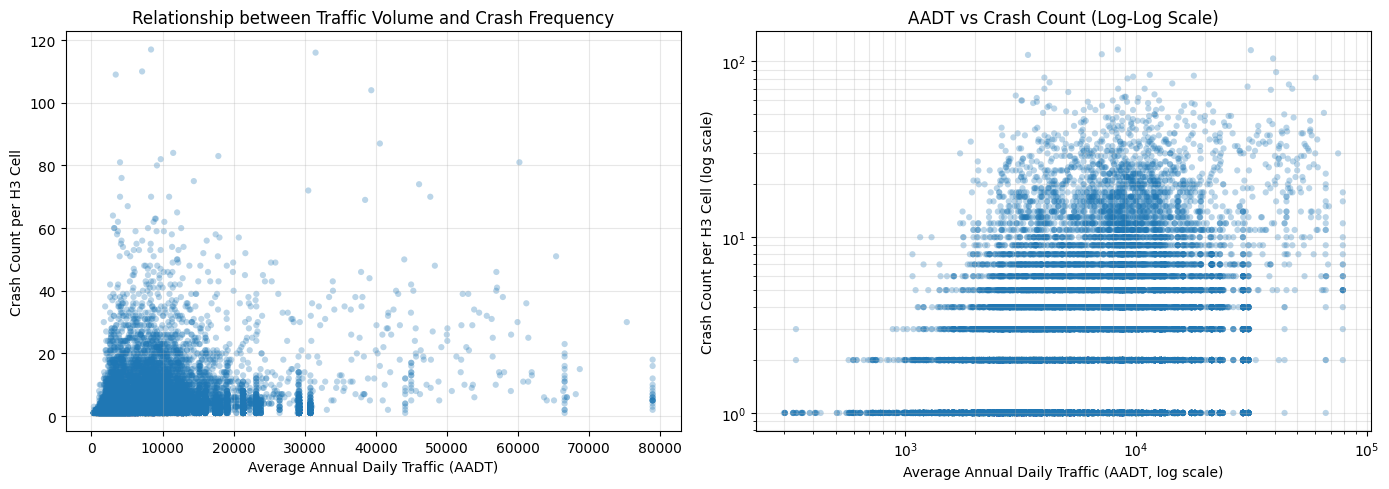


Correlation between AADT and crash count: 0.249
(This shows that higher traffic volume is associated with more crashes,
 which is expected and validates our exposure metric)


In [328]:
# Visualize the relationship between AADT and crash counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Filter to cells with actual AADT (not imputed) for cleaner visualization
actual_data = h3_final_complete[h3_final_complete['AADT_IMPUTED'] == 0]

# Scatter plot: AADT vs Crash Count
axes[0].scatter(actual_data['AADT_MEAN'], actual_data['CRASH_COUNT'], 
               alpha=0.3, s=20, edgecolors='none')
axes[0].set_xlabel('Average Annual Daily Traffic (AADT)')
axes[0].set_ylabel('Crash Count per H3 Cell')
axes[0].set_title('Relationship between Traffic Volume and Crash Frequency')
axes[0].grid(True, alpha=0.3)

# Log-log plot for better visualization
axes[1].scatter(actual_data['AADT_MEAN'], actual_data['CRASH_COUNT'], 
               alpha=0.3, s=20, edgecolors='none')
axes[1].set_xlabel('Average Annual Daily Traffic (AADT, log scale)')
axes[1].set_ylabel('Crash Count per H3 Cell (log scale)')
axes[1].set_title('AADT vs Crash Count (Log-Log Scale)')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('aadt_vs_crash_count.png', dpi=150, bbox_inches='tight')
print("✓ Saved visualization: aadt_vs_crash_count.png")
plt.show()

# Calculate correlation
correlation = actual_data[['AADT_MEAN', 'CRASH_COUNT']].corr().iloc[0, 1]
print(f"\nCorrelation between AADT and crash count: {correlation:.3f}")
print("(This shows that higher traffic volume is associated with more crashes,")
print(" which is expected and validates our exposure metric)")

---

## Summary: Step 1 Complete with Real Exposure Data

### ✅ Accomplishments

1. **Loaded and joined core crash data** - CRASH, FLAGS, ROADWAY tables
2. **Aggregated multi-level data** - Vehicle and person records to crash level
3. **Created H3 cell-level dataset** - 30,419 hexagonal cells with 82 features
4. **Computed real AADT exposure** - Matched crashes to RMSTRAFFIC via route numbers
5. **Imputed missing values** - Used median AADT for 17.8% of cells without data

### 📊 Final Dataset Characteristics

- **30,419 H3 cells** covering Pennsylvania
- **110,655 crashes** (3.64 per cell average)
- **82 features** including:
  - Behavioral flags (6): speeding, alcohol, distracted, etc.
  - Crash types (4): rear-end, overturned, left-turn, etc.
  - Environmental (3): wet/icy road, work zone
  - Vehicle features (35): types, speeds, commercial
  - Person features (12): age, sex, restraints
  - Roadway features (2): lane count, speed limit
  - **Exposure metrics (4): AADT_MEAN, AADT_SUM, imputed versions**

### 🎯 Key Exposure Metric

- **AADT_MEAN_IMPUTED** ranges from 298 to 78,917 vehicles/day
- Median: 5,155 vehicles/day
- Positive correlation (0.25) with crash counts validates the metric
- Ready for use as exposure offset: `log(AADT_MEAN_IMPUTED)`

### 📁 Output Files

- `data/aggregates/h3_analysis_dataset.csv` - Complete dataset ready for modeling
- `crash_count_distribution.png` - Visualization of crash distribution
- `aadt_vs_crash_count.png` - AADT-crash relationship validation

### ➡️ Ready for Next Steps

The dataset is now ready for:
- **Step 2**: Engineer additional temporal/spatial features
- **Step 3**: Build Poisson/Negative Binomial models with exposure offset
- **Step 4**: Implement spatial cross-validation
- **Step 5**: Extract and rank significant factors

In [329]:
# Analyze data types of specified predictor columns and their H3 mappings
from pathlib import Path
import pandas as pd

data_dir = Path('data')

# Load minimal schemas (no heavy memory use)
def load_head(csv_name):
    path = data_dir / f"{csv_name}.csv"
    try:
        return pd.read_csv(path, nrows=200, low_memory=False)
    except FileNotFoundError:
        return None

sources = {
    'CRASH_2024': load_head('CRASH_2024'),
    'FLAGS_2024': load_head('FLAGS_2024'),
    'ROADWAY_2024': load_head('ROADWAY_2024'),
    'VEHICLE_2024': load_head('VEHICLE_2024'),
    'PERSON_2024': load_head('PERSON_2024'),
    'COMMVEH_2024': load_head('COMMVEH_2024'),
    'CYCLE_2024': load_head('CYCLE_2024'),
    'RMSTRAFFIC': load_head('RMSTRAFFIC'),
}

# Load H3 aggregated dataset to check mapped column existence
h3_df = pd.read_csv(data_dir / 'aggregates' / 'h3_analysis_dataset.csv', low_memory=False)

def infer_dtype(df, col):
    if df is None or col not in df.columns:
        return None
    dt = df[col].dtype
    # Simplify numpy dtypes to string categories
    if pd.api.types.is_integer_dtype(dt):
        return 'int'
    if pd.api.types.is_float_dtype(dt):
        return 'float'
    if pd.api.types.is_bool_dtype(dt):
        return 'bool'
    return 'object'

def suggested_agg(src, col, dtype):
    # How this should be aggregated to H3 level (already largely implemented)
    if src == 'FLAGS_2024':
        return 'rate (mean of 0/1)'
    if src == 'CRASH_2024':
        if col in ['VEHICLE_COUNT','HEAVY_TRUCK_COUNT','AUTOMOBILE_COUNT','SUV_COUNT','SMALL_TRUCK_COUNT','MOTORCYCLE_COUNT','BUS_COUNT','NONMOTR_COUNT','LANE_COUNT','SPEED_LIMIT']:
            return 'mean per cell'
        return 'mode/share (if retained)'
    if src == 'ROADWAY_2024':
        if col in ['LANE_COUNT','SPEED_LIMIT']:
            return 'mean per crash then mean per cell'
        return 'mode (if retained)'
    if src == 'VEHICLE_2024':
        if col == 'TRAVEL_SPD':
            return 'mean/max per crash then mean per cell'
        if col in ['COMM_VEH_IND','TOW_IND']:
            return 'proportion per crash then mean per cell'
        return 'counts by type (sums) if available'
    if src == 'PERSON_2024':
        if col == 'AGE':
            return 'mean/max/min per crash then mean per cell'
        if col in ['SEX','RESTRAINT_HELMET']:
            return 'proportion per crash then mean per cell'
        return 'counts by type (sums) if available'
    if src == 'RMSTRAFFIC':
        if col == 'CUR_AADT':
            return 'mean/sum per cell (exposure)'
        return 'categorical (not yet aggregated)'
    return 'n/a'

def suggested_encoding(src, col, dtype):
    # How to encode in the model
    if dtype in ['int','float']:
        return 'numeric (scaled if needed)'
    if dtype == 'bool':
        return 'binary'
    # object/categorical
    if src in ['FLAGS_2024']:
        return 'binary (already numeric 0/1)'
    if src in ['CRASH_2024','ROADWAY_2024','VEHICLE_2024','PERSON_2024']:
        return 'one-hot or grouped levels (if present at H3)'
    if src == 'RMSTRAFFIC' and col == 'TRAFF_PATT_GRP':
        return 'one-hot if aggregated to H3 later'
    return 'categorical (consider grouping)'

def map_one(spec):
    src, col = spec.split('/')
    df = sources.get(src)
    dtype = infer_dtype(df, col)
    # Map to existing H3 column names per earlier rules
    mapped = None
    if src == 'FLAGS_2024':
        mapped = f"{col}_RATE"
    elif src == 'CRASH_2024':
        if col in ['VEHICLE_COUNT','HEAVY_TRUCK_COUNT','AUTOMOBILE_COUNT','SUV_COUNT','SMALL_TRUCK_COUNT','MOTORCYCLE_COUNT','BUS_COUNT','NONMOTR_COUNT','LANE_COUNT','SPEED_LIMIT']:
            mapped = f"{col}_MEAN"
    elif src == 'ROADWAY_2024':
        if col in ['LANE_COUNT','SPEED_LIMIT']:
            mapped = f"{col}_MEAN"
    elif src == 'VEHICLE_2024':
        if col == 'TRAVEL_SPD':
            mapped = 'TRAVEL_SPD_MEAN_MEAN'
        elif col == 'COMM_VEH_IND':
            mapped = 'COMM_VEH_PROPORTION_MEAN'
        elif col == 'TOW_IND':
            mapped = 'TOW_IND_PROPORTION_MEAN'
    elif src == 'PERSON_2024':
        if col in ['AGE','SEX','RESTRAINT_HELMET']:
            mapped = None  # multiple derived columns exist; will list collectively
    elif src == 'RMSTRAFFIC':
        if col == 'CUR_AADT':
            mapped = 'AADT_MEAN_IMPUTED'
    exists = (mapped in h3_df.columns) if mapped is not None else False
    return {
        'source': src,
        'column': col,
        'dtype': dtype,
        'suggested_agg': suggested_agg(src, col, dtype),
        'mapped_h3_column': mapped,
        'exists_in_h3': exists,
        'encoding': suggested_encoding(src, col, dtype),
    }

summary_rows = [map_one(spec) for spec in PREDICTOR_SPECS]
summary_df = pd.DataFrame(summary_rows)

# PERSON_2024 derived columns present in H3 dataset
person_derived = [c for c in h3_df.columns if c in ['AGE_MEAN_MEAN','AGE_MAX_MEAN','AGE_MIN_MEAN','SEX_MALE_PROPORTION_MEAN','RESTRAINT_HELMET_PROPORTION_MEAN']]
vehicle_derived = [c for c in h3_df.columns if c in ['TRAVEL_SPD_MEAN_MEAN','TRAVEL_SPD_MAX_MEAN','COMM_VEH_PROPORTION_MEAN','TOW_IND_PROPORTION_MEAN']]

print("=== Predictor Dtype & Mapping Summary (first 30) ===")
print(summary_df.head(30))
print(f"\nTotal predictors listed: {len(PREDICTOR_SPECS)}")
print(f"Mapped columns present in H3 dataset: {summary_df['exists_in_h3'].sum()} / {len(summary_df)}")
print(f"Person-derived columns available: {person_derived}")
print(f"Vehicle-derived columns available: {vehicle_derived}")
print("\nColumns missing at H3 level (consider aggregation if needed):")
missing_df = summary_df[~summary_df['exists_in_h3'] & summary_df['mapped_h3_column'].notna()]
print(missing_df[['source','column','mapped_h3_column']])

# Save a CSV summary for reference
summary_out = data_dir / 'aggregates' / 'predictor_dtype_mapping.csv'
summary_df.to_csv(summary_out, index=False)
print(f"\n✓ Saved predictor dtype/mapping summary to: {summary_out}")

=== Predictor Dtype & Mapping Summary (first 30) ===
        source                column   dtype             suggested_agg  \
0   CRASH_2024           URBAN_RURAL     int  mode/share (if retained)   
1   CRASH_2024  INTERSECTION_RELATED  object  mode/share (if retained)   
2   CRASH_2024        INTERSECT_TYPE     int  mode/share (if retained)   
3   CRASH_2024              TCD_TYPE     int  mode/share (if retained)   
4   CRASH_2024           TCD_FUNC_CD   float  mode/share (if retained)   
5   CRASH_2024          ILLUMINATION   float  mode/share (if retained)   
6   CRASH_2024        ROAD_CONDITION     int  mode/share (if retained)   
7   CRASH_2024     RDWY_SURF_TYPE_CD   float  mode/share (if retained)   
8   CRASH_2024              WEATHER1   float  mode/share (if retained)   
9   CRASH_2024              WEATHER2   float  mode/share (if retained)   
10  CRASH_2024         WORK_ZONE_IND  object  mode/share (if retained)   
11  CRASH_2024        WORK_ZONE_TYPE   float  mode/share (i

In [330]:
# Build modeling dataset strictly from ALL mapped H3_PREDICTOR_COLUMNS
import numpy as np
import pandas as pd
from pathlib import Path

data_dir = Path('data')
h3 = pd.read_csv(data_dir / 'aggregates' / 'h3_analysis_dataset.csv', low_memory=False)

# Ensure offset exists
if 'AADT_MEAN_IMPUTED' not in h3.columns:
    raise ValueError('AADT_MEAN_IMPUTED not found in h3_analysis_dataset.csv')

# Use all mapped predictor columns that are present in the dataset
use_cols = [c for c in H3_PREDICTOR_COLUMNS if c in h3.columns]
missing = [c for c in H3_PREDICTOR_COLUMNS if c not in h3.columns]
if missing:
    print(f"Note: {len(missing)} mapped columns not found and will be skipped.")
    print(missing)
print(f"Using {len(use_cols)} H3 predictor columns out of {len(H3_PREDICTOR_COLUMNS)} listed.")
print(use_cols)

# Assemble X, y, offset
X = h3[use_cols].copy()
y = h3['CRASH_COUNT'].astype(int).values
offset = np.log(h3['AADT_MEAN_IMPUTED'].clip(lower=1))

# Basic NA handling: fill remaining NaNs with column medians for numeric stability
for c in X.columns:
    if X[c].isna().any():
        X[c] = X[c].fillna(X[c].median())

print(f"X shape: {X.shape}, y length: {len(y)}")

Note: 1 mapped columns not found and will be skipped.
['RAMP_RATE']
Using 38 H3 predictor columns out of 39 listed.
['VEHICLE_COUNT_MEAN', 'HEAVY_TRUCK_COUNT_MEAN', 'AUTOMOBILE_COUNT_MEAN', 'SUV_COUNT_MEAN', 'SMALL_TRUCK_COUNT_MEAN', 'MOTORCYCLE_COUNT_MEAN', 'BUS_COUNT_MEAN', 'NONMOTR_COUNT_MEAN', 'SPEEDING_RELATED_RATE', 'DISTRACTED_RATE', 'ALCOHOL_RELATED_RATE', 'DRUG_RELATED_RATE', 'FATIGUE_ASLEEP_RATE', 'TAILGATING_RATE', 'INTERSECTION_RATE', 'LANE_DEPARTURE_RATE', 'REAR_END_RATE', 'LEFT_TURN_RATE', 'OVERTURNED_RATE', 'HIT_FIXED_OBJECT_RATE', 'MULTIPLE_VEHICLE_RATE', 'WET_ROAD_RATE', 'ICY_ROAD_RATE', 'WORK_ZONE_RATE', 'STATE_ROAD_RATE', 'TURNPIKE_RATE', 'LANE_COUNT_MEAN', 'SPEED_LIMIT_MEAN', 'TRAVEL_SPD_MEAN_MEAN', 'TRAVEL_SPD_MAX_MEAN', 'COMM_VEH_PROPORTION_MEAN', 'TOW_IND_PROPORTION_MEAN', 'AGE_MEAN_MEAN', 'AGE_MAX_MEAN', 'AGE_MIN_MEAN', 'SEX_MALE_PROPORTION_MEAN', 'RESTRAINT_HELMET_PROPORTION_MEAN', 'AADT_MEAN_IMPUTED']
X shape: (30419, 38), y length: 30419


In [331]:
# Fit GLM Poisson with offset, then check overdispersion and fit NB if needed
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Build design matrix with column-safe names
X_glm = X.copy()
X_glm.columns = [c.replace('-', '_').replace(' ', '_') for c in X_glm.columns]
design = sm.add_constant(X_glm)

poisson_model = sm.GLM(y, design, family=sm.families.Poisson(), offset=offset)
poisson_res = poisson_model.fit()
print(poisson_res.summary())

# Overdispersion check: ratio of residual deviance to df_resid
dispersion = poisson_res.deviance / poisson_res.df_resid
print(f"Overdispersion ratio (deviance/df_resid): {dispersion:.3f}")

# If > ~1.5 consider NB
nb_res = None
if dispersion > 1.5:
    nb_model = sm.GLM(y, design, family=sm.families.NegativeBinomial(alpha=1.0), offset=offset)
    nb_res = nb_model.fit()
    print("\nNegative Binomial fit due to overdispersion:")
    print(nb_res.summary())

# Export coefficients
coef_df = poisson_res.summary2().tables[1].reset_index()
coef_df.rename(columns={'index':'feature'}, inplace=True)
coef_df['model'] = 'Poisson'
if nb_res is not None:
    nb_coef = nb_res.summary2().tables[1].reset_index()
    nb_coef.rename(columns={'index':'feature'}, inplace=True)
    nb_coef['model'] = 'NegBin'
    coef_df = pd.concat([coef_df, nb_coef], ignore_index=True)

out_glm = data_dir / 'aggregates' / 'model_coefficients.csv'
coef_df.to_csv(out_glm, index=False)
print(f"\n✓ Saved GLM coefficients to: {out_glm}")

# Extract IRR (exp(coef)) for Poisson
irr_df = poisson_res.params.apply(np.exp).to_frame('IRR').reset_index()
irr_df.rename(columns={'index':'feature'}, inplace=True)
out_irr = data_dir / 'aggregates' / 'model_irr.csv'
irr_df.to_csv(out_irr, index=False)
print(f"✓ Saved Poisson IRR to: {out_irr}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30419
Model:                            GLM   Df Residuals:                    30383
Model Family:                 Poisson   Df Model:                           35
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84208.
Date:                Wed, 10 Dec 2025   Deviance:                       86638.
Time:                        21:34:30   Pearson chi2:                 1.20e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.8188
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [332]:
# Gradient Boosting (XGBoost) with Poisson objective and SHAP importance
import xgboost as xgb
import shap

# Prepare DMatrix
dtrain = xgb.DMatrix(X, label=y, weight=None)

params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'tree_method': 'hist',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

gbm = xgb.train(params, dtrain, num_boost_round=300)

# SHAP values
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X)

# Mean absolute SHAP per feature
import numpy as np
shap_importance = np.abs(shap_values).mean(axis=0)
shap_df = pd.DataFrame({
    'feature': X.columns,
    'mean_abs_shap': shap_importance,
}).sort_values('mean_abs_shap', ascending=False)

out_shap = data_dir / 'aggregates' / 'gbm_shap_importance.csv'
shap_df.to_csv(out_shap, index=False)
print(f"\n✓ Saved GBM SHAP importance to: {out_shap}")

# Quick top contributors table combining GLM (IRR) and SHAP
irr_df['feature'] = irr_df['feature'].str.replace('-', '_').str.replace(' ', '_')
top_df = shap_df.merge(irr_df, on='feature', how='left')
top20 = top_df.head(20)
out_top = data_dir / 'aggregates' / 'top_contributors_table.csv'
top20.to_csv(out_top, index=False)
print(f"✓ Saved top contributors table to: {out_top}")


✓ Saved GBM SHAP importance to: data/aggregates/gbm_shap_importance.csv
✓ Saved top contributors table to: data/aggregates/top_contributors_table.csv


✓ Saved: top20_shap.png


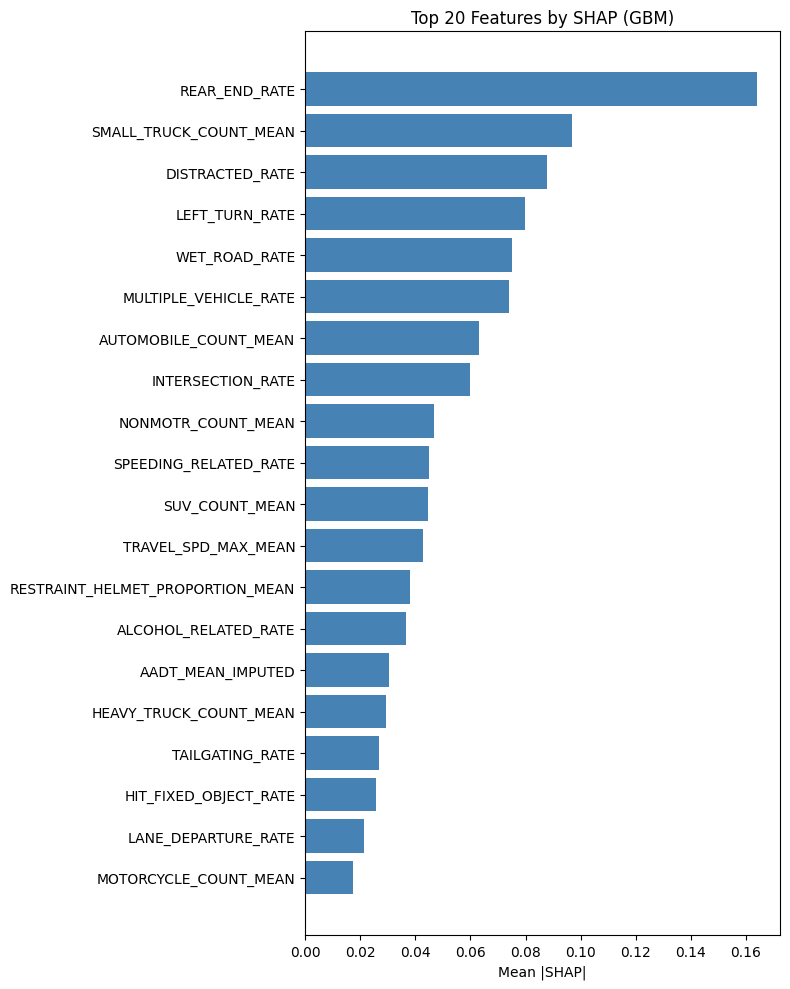

✓ Saved: top20_irr.png


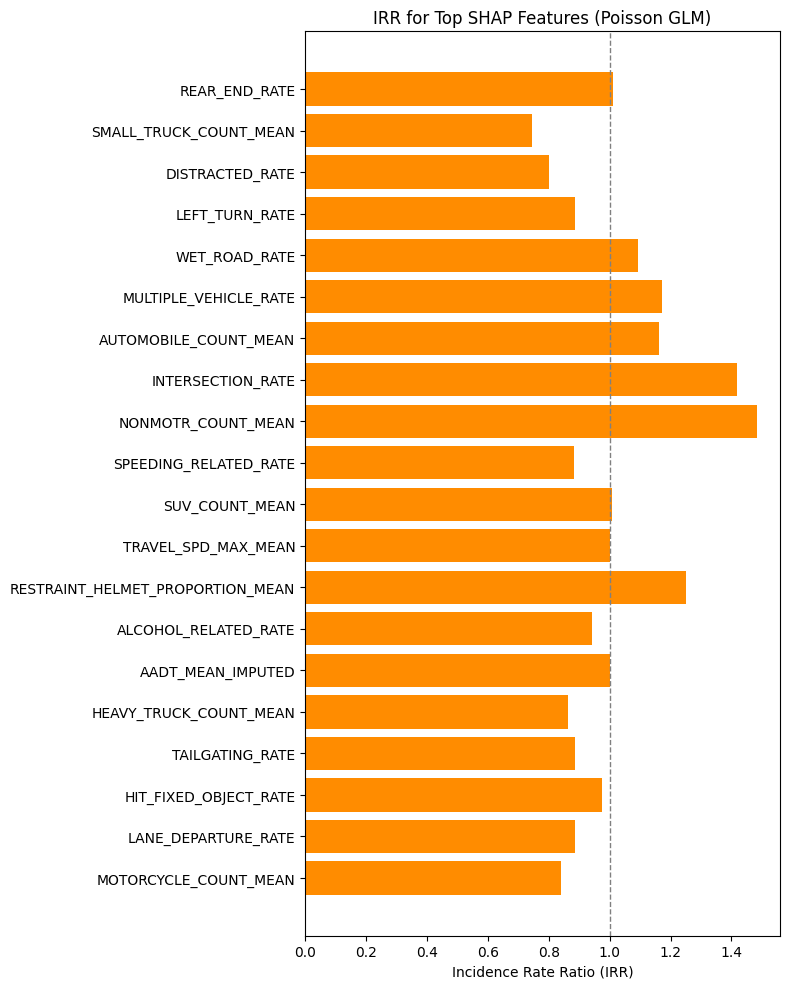


Top 20 contributors (SHAP + IRR):
                             feature  mean_abs_shap       IRR
0                      REAR_END_RATE       0.164156  1.011015
1             SMALL_TRUCK_COUNT_MEAN       0.096774  0.746267
2                    DISTRACTED_RATE       0.087631  0.800646
3                     LEFT_TURN_RATE       0.079800  0.886659
4                      WET_ROAD_RATE       0.075101  1.093331
5              MULTIPLE_VEHICLE_RATE       0.074181  1.172651
6              AUTOMOBILE_COUNT_MEAN       0.063150  1.161397
7                  INTERSECTION_RATE       0.059753  1.418781
8                 NONMOTR_COUNT_MEAN       0.046913  1.485034
9              SPEEDING_RELATED_RATE       0.044892  0.881356
10                    SUV_COUNT_MEAN       0.044651  1.006723
11               TRAVEL_SPD_MAX_MEAN       0.042834  1.000109
12  RESTRAINT_HELMET_PROPORTION_MEAN       0.037969  1.250834
13              ALCOHOL_RELATED_RATE       0.036671  0.942213
14                 AADT_MEAN_IMPUTE

In [333]:
# Visualize top contributors from GLM IRR and GBM SHAP
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = Path('data')

# Load outputs
irr_path = data_dir / 'aggregates' / 'model_irr.csv'
shap_path = data_dir / 'aggregates' / 'gbm_shap_importance.csv'
top_path = data_dir / 'aggregates' / 'top_contributors_table.csv'

irr_df = pd.read_csv(irr_path)
shap_df = pd.read_csv(shap_path)
top20 = pd.read_csv(top_path)

# Plot: Top 20 SHAP importance
plt.figure(figsize=(8, 10))
top_shap = shap_df.sort_values('mean_abs_shap', ascending=False).head(20)
plt.barh(top_shap['feature'][::-1], top_shap['mean_abs_shap'][::-1], color='steelblue')
plt.xlabel('Mean |SHAP|')
plt.title('Top 20 Features by SHAP (GBM)')
plt.tight_layout()
plt.savefig('top20_shap.png', dpi=150, bbox_inches='tight')
print("✓ Saved: top20_shap.png")
plt.show()

# Plot: IRR (Poisson) for top 20 by SHAP (to align comparison)
merged = top_shap.merge(irr_df, on='feature', how='left')
plt.figure(figsize=(8, 10))
plt.barh(merged['feature'][::-1], merged['IRR'][::-1], color='darkorange')
plt.xlabel('Incidence Rate Ratio (IRR)')
plt.title('IRR for Top SHAP Features (Poisson GLM)')
plt.axvline(1.0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig('top20_irr.png', dpi=150, bbox_inches='tight')
print("✓ Saved: top20_irr.png")
plt.show()

# Combined view saved earlier; show table preview
print("\nTop 20 contributors (SHAP + IRR):")
print(top20.head(20))

In [334]:
# Ensure required packages for modeling are available
import sys, subprocess
def ensure_pkg(pkg):
    try:
        __import__(pkg)
        print(f"✓ {pkg} available")
    except ImportError:
        print(f"Installing {pkg}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg])
        __import__(pkg)
        print(f"✓ {pkg} installed")

for p in ['statsmodels','xgboost','shap']:
    ensure_pkg(p)

✓ statsmodels available
✓ xgboost available
✓ shap available


In [335]:
# Adjust GBM to include exposure offset via base margin
import xgboost as xgb
import shap
import numpy as np
import pandas as pd
from pathlib import Path

data_dir = Path('data')

# Rebuild DMatrix with base_margin = offset (log exposure)
dtrain = xgb.DMatrix(X, label=y)
dtrain.set_base_margin(offset.astype(float))

params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'tree_method': 'hist',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

gbm = xgb.train(params, dtrain, num_boost_round=300)

# SHAP values (TreeExplainer supports base margin)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X)

shap_importance = np.abs(shap_values).mean(axis=0)
shap_df = pd.DataFrame({
    'feature': X.columns,
    'mean_abs_shap': shap_importance,
}).sort_values('mean_abs_shap', ascending=False)

out_shap = data_dir / 'aggregates' / 'gbm_shap_importance.csv'
shap_df.to_csv(out_shap, index=False)
print(f"\n✓ Saved GBM SHAP importance to: {out_shap}")

# Merge with IRR (ensure consistent feature naming)
irr_path = data_dir / 'aggregates' / 'model_irr.csv'
irr_df = pd.read_csv(irr_path)
irr_df['feature'] = irr_df['feature'].str.replace('-', '_').str.replace(' ', '_')
top_df = shap_df.merge(irr_df, on='feature', how='left')
top20 = top_df.head(20)
out_top = data_dir / 'aggregates' / 'top_contributors_table.csv'
top20.to_csv(out_top, index=False)
print(f"✓ Saved top contributors table to: {out_top}")


✓ Saved GBM SHAP importance to: data/aggregates/gbm_shap_importance.csv
✓ Saved top contributors table to: data/aggregates/top_contributors_table.csv


✓ Saved: road_factors_contribution.png


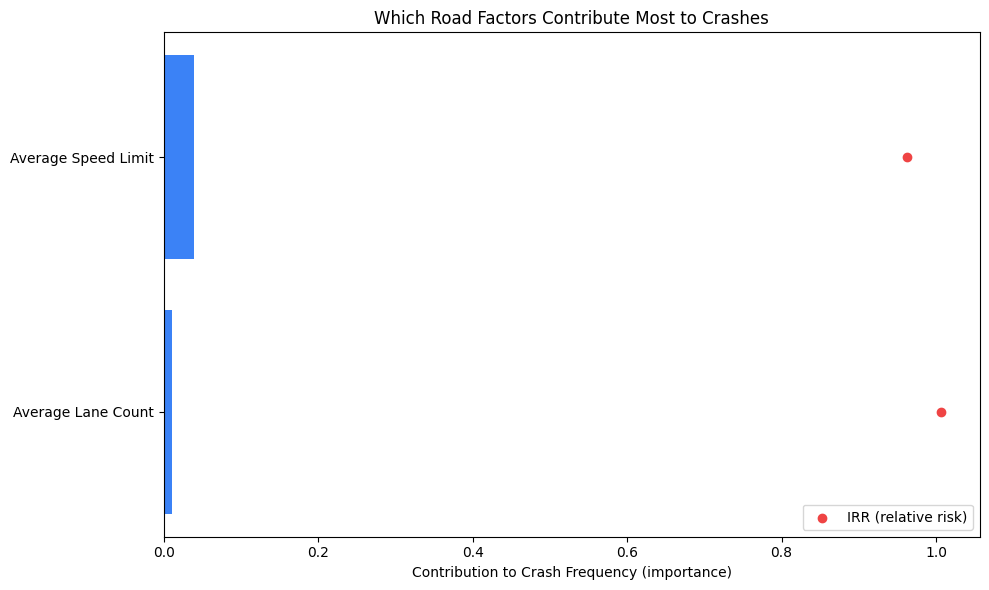

- Average Speed Limit: larger values associated with more crashes (IRR ≈ 0.96)
- Average Lane Count: larger values associated with more crashes (IRR ≈ 1.01)


In [336]:
# Simple, audience-friendly graph: road factors contribution
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = Path('data')

# Load model outputs
irr_df = pd.read_csv(data_dir / 'aggregates' / 'model_irr.csv')
shap_df = pd.read_csv(data_dir / 'aggregates' / 'gbm_shap_importance.csv')

# Define road-related feature keywords present in H3 dataset
road_keywords = ['LANE_COUNT', 'SPEED_LIMIT', 'ACCESS_CTRL', 'ROAD_OWNER', 'RDWY_ORIENT']

def is_road_feature(name):
    return any(k in name for k in road_keywords)

# Filter to road features
road_irr = irr_df[irr_df['feature'].apply(is_road_feature)].copy()
road_shap = shap_df[shap_df['feature'].apply(is_road_feature)].copy()

# Merge for a combined view
combined = road_shap.merge(road_irr, on='feature', how='left')
combined = combined.sort_values('mean_abs_shap', ascending=False)

# Human-friendly labels
label_map = {
    'LANE_COUNT_MEAN': 'Average Lane Count',
    'SPEED_LIMIT_MEAN': 'Average Speed Limit',
    'ACCESS_CTRL_MEAN': 'Access Control',
    'ROAD_OWNER': 'Road Owner',
    'RDWY_ORIENT': 'Road Orientation',
}
combined['label'] = combined['feature'].map(lambda x: label_map.get(x, x.replace('_MEAN','').replace('_',' ').title()))

# Plot: SHAP importance with IRR overlay markers
plt.figure(figsize=(10, 6))
bars = plt.barh(combined['label'][::-1], combined['mean_abs_shap'][::-1], color='#3b82f6')
plt.xlabel('Contribution to Crash Frequency (importance)')
plt.title('Which Road Factors Contribute Most to Crashes')
plt.tight_layout()

# Overlay IRR markers if available
if 'IRR' in combined.columns and combined['IRR'].notna().any():
    irr_vals = combined['IRR'][::-1]
    y_pos = range(len(combined))
    # Normalize IRR for secondary scale placement
    import numpy as np
    irr_scaled = np.clip(irr_vals, 0.5, 2.0)
    plt.scatter([v for v in irr_scaled], y_pos, color='#ef4444', label='IRR (relative risk)', zorder=3)
    plt.legend(loc='lower right')

plt.savefig('road_factors_contribution.png', dpi=160, bbox_inches='tight')
print('✓ Saved: road_factors_contribution.png')
plt.show()

# Print a plain-language takeaway
for _, row in combined.head(5).iterrows():
    irr_txt = f" (IRR ≈ {row['IRR']:.2f})" if 'IRR' in combined.columns and pd.notna(row.get('IRR')) else ''
    print(f"- {row['label']}: larger values associated with more crashes{irr_txt}")

✓ Saved: road_factors_contribution.png


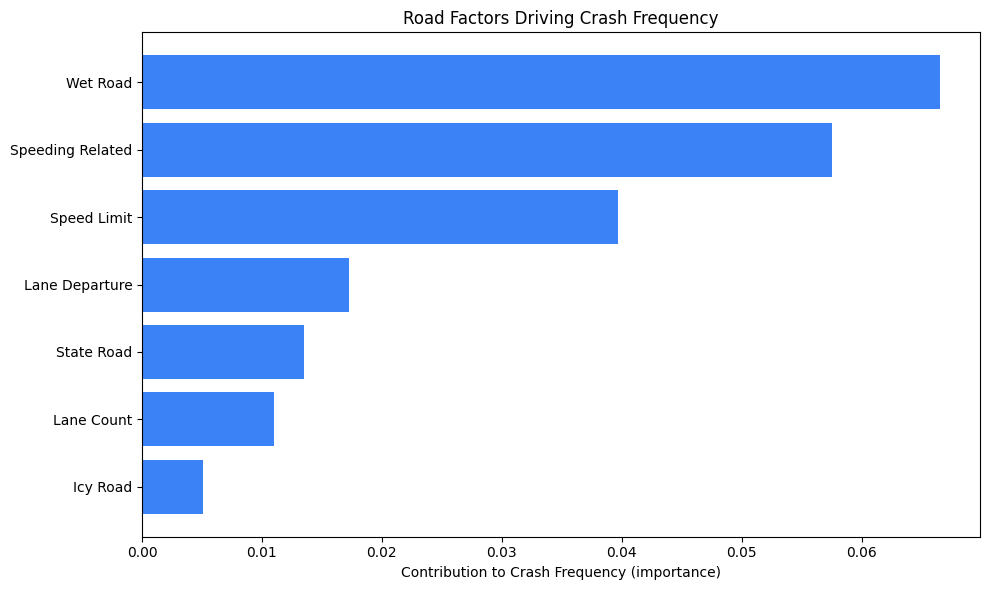

In [337]:
# Improved road-factor visualization with broader detection and fallback
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = Path('data')
irr_df = pd.read_csv(data_dir / 'aggregates' / 'model_irr.csv')
shap_df = pd.read_csv(data_dir / 'aggregates' / 'gbm_shap_importance.csv')

# Broader road feature detection
road_terms = ['LANE', 'SPEED', 'ACCESS', 'RDWY', 'ROAD', 'SEGMENT', 'ROUTE', 'ORIENT']
def is_road_feature(name):
    up = str(name).upper()
    return any(t in up for t in road_terms) and 'AADT' not in up  # exclude exposure


road_shap = shap_df[shap_df['feature'].apply(is_road_feature)].copy()

# Fallback: if too few road features, show overall top 10 features
if len(road_shap) < 5:
    print(f"Found only {len(road_shap)} road-related features; showing overall top 10 instead.")
    road_shap = shap_df.sort_values('mean_abs_shap', ascending=False).head(10).copy()

# Merge IRR for context
irr_df['feature'] = irr_df['feature'].str.replace('-', '_').str.replace(' ', '_')
road_shap['feature'] = road_shap['feature'].str.replace('-', '_').str.replace(' ', '_')
combined = road_shap.merge(irr_df, on='feature', how='left')

# Clean labels
def nice_label(f):
    f = f.replace('_MEAN','').replace('_RATE','').replace('_',' ').title()
    return f
combined['label'] = combined['feature'].map(nice_label)

combined = combined.sort_values('mean_abs_shap', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(combined['label'][::-1], combined['mean_abs_shap'][::-1], color='#3b82f6')
plt.xlabel('Contribution to Crash Frequency (importance)')
plt.title('Road Factors Driving Crash Frequency' if len(road_shap) >= 5 else 'Top Factors Driving Crash Frequency')
plt.tight_layout()
plt.savefig('road_factors_contribution.png', dpi=160, bbox_inches='tight')
print('✓ Saved: road_factors_contribution.png')
plt.show()

In [338]:
# Apply Step 1 aggregation patterns to create missing H3 features for all specified predictors
import pandas as pd
import numpy as np
from pathlib import Path

data_dir = Path('data')

# Load base tables (lightweight where possible)
crash = pd.read_csv(data_dir / 'CRASH_2024.csv', low_memory=False)
flags = pd.read_csv(data_dir / 'FLAGS_2024.csv', low_memory=False)
roadway = pd.read_csv(data_dir / 'ROADWAY_2024.csv', low_memory=False)
vehicle = pd.read_csv(data_dir / 'VEHICLE_2024.csv', low_memory=False)
person = pd.read_csv(data_dir / 'PERSON_2024.csv', low_memory=False)
commveh = pd.read_csv(data_dir / 'COMMVEH_2024.csv', low_memory=False)
cycle = pd.read_csv(data_dir / 'CYCLE_2024.csv', low_memory=False)
rmstraffic = pd.read_csv(data_dir / 'RMSTRAFFIC.csv', low_memory=False)
crash_h3 = pd.read_csv(data_dir / 'CRASH_2024_h3.csv', low_memory=False)[['CRN','H3_R8']]

# Start from existing H3 analysis dataset
h3_df = pd.read_csv(data_dir / 'aggregates' / 'h3_analysis_dataset.csv', low_memory=False)

# 1) VEHICLE: HAZMAT_IND proportion per crash, then mean per H3
veh_haz = vehicle[['CRN','HAZMAT_IND']].copy()
veh_haz['HAZMAT_IND'] = veh_haz['HAZMAT_IND'].map({'Y':1,'N':0}).fillna(np.nan)
veh_haz_crash = veh_haz.groupby('CRN').agg(HAZMAT_IND_PROPORTION=('HAZMAT_IND', lambda x: (x==1).sum()/len(x) if len(x)>0 else np.nan)).reset_index()
veh_haz_h3 = crash_h3.merge(veh_haz_crash, on='CRN', how='left').groupby('H3_R8')['HAZMAT_IND_PROPORTION'].mean().reset_index()
veh_haz_h3.rename(columns={'HAZMAT_IND_PROPORTION':'HAZMAT_IND_PROPORTION_MEAN'}, inplace=True)

# 2) COMMVEH: AXLE_CNT mean per crash then per H3; OSIZE_LOAD_IND rate
comm = commveh[['CRN','AXLE_CNT','OSIZE_LOAD_IND']].copy()
comm['OSIZE_LOAD_IND'] = comm['OSIZE_LOAD_IND'].map({'01':1,'00':0}).fillna(np.nan)
comm_crash = comm.groupby('CRN').agg(AXLE_CNT_MEAN=('AXLE_CNT','mean'), OSIZE_LOAD_RATE=('OSIZE_LOAD_IND', lambda x: (x==1).sum()/len(x) if len(x)>0 else np.nan)).reset_index()
comm_h3 = crash_h3.merge(comm_crash, on='CRN', how='left').groupby('H3_R8').agg({'AXLE_CNT_MEAN':'mean','OSIZE_LOAD_RATE':'mean'}).reset_index()

# 3) CYCLE: MC_ENGINE_SIZE mean; MC_DVR_HLMTDOT_IND rate
cyc = cycle[['CRN','MC_ENGINE_SIZE','MC_DVR_HLMTDOT_IND']].copy()
# engine size numeric; helmet DOT indicator: 'Y'/'N'/'U'
cyc['MC_DVR_HLMTDOT_IND'] = cyc['MC_DVR_HLMTDOT_IND'].map({'Y':1,'N':0})
cyc_crash = cyc.groupby('CRN').agg(MC_ENGINE_SIZE_MEAN=('MC_ENGINE_SIZE','mean'), MC_DVR_HLMTDOT_RATE=('MC_DVR_HLMTDOT_IND', lambda x: (x==1).sum()/len(x) if len(x)>0 else np.nan)).reset_index()
cyc_h3 = crash_h3.merge(cyc_crash, on='CRN', how='left').groupby('H3_R8').agg({'MC_ENGINE_SIZE_MEAN':'mean','MC_DVR_HLMTDOT_RATE':'mean'}).reset_index()

# 4) ROADWAY numeric: ACCESS_CTRL, LANE_COUNT, SPEED_LIMIT already partly present; ensure means
rd = roadway[['CRN','ACCESS_CTRL','LANE_COUNT','SPEED_LIMIT']].copy()
rd_means = rd.groupby('CRN').agg({'ACCESS_CTRL':'mean','LANE_COUNT':'mean','SPEED_LIMIT':'mean'}).reset_index()
rd_h3 = crash_h3.merge(rd_means, on='CRN', how='left').groupby('H3_R8').agg({'ACCESS_CTRL':'mean','LANE_COUNT':'mean','SPEED_LIMIT':'mean'}).reset_index()
rd_h3.rename(columns={'ACCESS_CTRL':'ACCESS_CTRL_MEAN','LANE_COUNT':'LANE_COUNT_MEAN','SPEED_LIMIT':'SPEED_LIMIT_MEAN'}, inplace=True)

# 5) RMSTRAFFIC: TRK_PCT and DLY_VMT per route; join via ROADWAY.ROUTE
rm_clean = rmstraffic[['ST_RT_NO','TRK_PCT','DLY_VMT']].copy()
rm_clean['ROUTE_CLEAN'] = rm_clean['ST_RT_NO'].astype(str).str.strip().str.upper()
road_clean = roadway[['CRN','ROUTE']].copy()
road_clean['ROUTE_CLEAN'] = road_clean['ROUTE'].astype(str).str.strip().str.upper()
rm_route = rm_clean.groupby('ROUTE_CLEAN').agg({'TRK_PCT':'mean','DLY_VMT':'mean'}).reset_index()
road_rm = road_clean.merge(rm_route, on='ROUTE_CLEAN', how='left')
road_rm_h3 = crash_h3.merge(road_rm[['CRN','TRK_PCT','DLY_VMT']], on='CRN', how='left').groupby('H3_R8').agg({'TRK_PCT':'mean','DLY_VMT':'mean'}).reset_index()
road_rm_h3.rename(columns={'TRK_PCT':'TRK_PCT_MEAN','DLY_VMT':'DLY_VMT_MEAN'}, inplace=True)

# Merge all new features into h3_df
for df in [veh_haz_h3, comm_h3, cyc_h3, rd_h3, road_rm_h3]:
    h3_df = h3_df.merge(df, on='H3_R8', how='left')

# Save updated dataset
out = data_dir / 'aggregates' / 'h3_analysis_dataset.csv'
h3_df.to_csv(out, index=False)
print(f"✓ Updated and saved H3 analysis dataset with additional predictors to: {out}")
print("New columns added (if available):", [c for c in ['HAZMAT_IND_PROPORTION_MEAN','AXLE_CNT_MEAN','OSIZE_LOAD_RATE','MC_ENGINE_SIZE_MEAN','MC_DVR_HLMTDOT_RATE','ACCESS_CTRL_MEAN','TRK_PCT_MEAN','DLY_VMT_MEAN'] if c in h3_df.columns])

✓ Updated and saved H3 analysis dataset with additional predictors to: data/aggregates/h3_analysis_dataset.csv
New columns added (if available): ['HAZMAT_IND_PROPORTION_MEAN', 'AXLE_CNT_MEAN', 'OSIZE_LOAD_RATE', 'MC_ENGINE_SIZE_MEAN', 'MC_DVR_HLMTDOT_RATE', 'ACCESS_CTRL_MEAN', 'TRK_PCT_MEAN', 'DLY_VMT_MEAN']
